# **統計期末專案 — 程式設計課程中，學生的學習習慣是否影響考試表現？**

B09705001 陳杰彤 B09705002 鄭安芸 B09705017 王紹安 B08705016 鄭亦倢<br>
B09705005 侯維書 B08705058 劉亞絜 B08705053 葉小漓 B08705018 莊莊


## **分析主題以及動機**

 我們的主題為「程式設計課程中，影響高低分表現之因素」。主要探討內容有兩部分：第一，高低分群是否在學習習性上有差異。第二，我們取出第一次期中考至第二次期中考，成績有顯著提升或下降的學生，分析他們和其他學生相比，學習習性是否有不同之處。

我們期望能藉由分析成績進步及高分群學生的習性，歸納出有效的學習模式，提供往後修課的同學一個模範，甚至可以應用其他學習上。相反地，也希望能歸納出造成成績下滑的特質，以此為借鏡，避免抱持相同的學習態度及行為。

在報告中，我們將會分析作業成績與考試成績的相關性、高分群與低分群在單次作業中的繳交次數平均（包含總繳交次數平均、期中考前後繳交次數、AC 前與 AC 後的繳交次數平均）、繳交時間（包含所有繳交時間、第一次開始繳交作業的時間），以及是否撰寫考古題等習性，並透過假設檢定驗證學習動機是否會影響考試成績。希望藉此找到一些高分群不同於低分群的地方，作為之後要修這門課的學弟妹們的參考依據。

## **資料描述**

我們的資料來源取自 PDOGS 資料庫。PDOGS 資料庫總共 29 張表格，裡面包含資管系大一必修程式設計課程、資管系大三必修資料庫管理課程以及商管程式設計課程等學生作業上傳狀況及考試成績，而我們取其中「程式設計課程 108 及 109 年」的學生相關資料作分析。我們在資料庫中下 SQL 指令，抓取資料庫中的 class_member, challenge, problem, submission, 	judgment 表格，整理成 23 份檔案，以便後續分析。


以下為整理出之檔案列表：

* Stat_2021_a_2_PD108_ChallengeFirstSubmit.csv
* Stat_2021_a_2_PD108_FirstSubmissionTimeStat.csv
* Stat_2021_a_2_PD108_OldExam2orNot.csv
* Stat_2021_a_2_PD108_OldExamOrNot.csv
* Stat_2021_a_2_PD108_SubmissionStat.csv
* Stat_2021_a_2_PD108_SubmissionTimeStat.csv
* Stat_2021_a_2_PD108_hwAndExamAvg.xlsx
* Stat_2021_a_2_PD108_midterm1_score.csv
* Stat_2021_a_2_PD108_midterm2_score.csv
* Stat_2021_a_2_PD108midterm1_score.csv
* Stat_2021_a_2_PD108midterm2_score.csv
* Stat_2021_a_2_PD109_ChallengeFirstSubmit.csv
* Stat_2021_a_2_PD109_FirstSubmissionTimeStat.csv
* Stat_2021_a_2_PD109_OldExam2orNot.csv
* Stat_2021_a_2_PD109_OldExamOrNot.csv
* Stat_2021_a_2_PD109_SubmissionStat.csv
* Stat_2021_a_2_PD109_SubmissionTimeStat.csv
* Stat_2021_a_2_PD109_hwAndExamAvg.xlsx
* Stat_2021_a_2_PD109_midterm1_score.csv
* Stat_2021_a_2_PD109_midterm2_score.csv
* Stat_2021_a_2_PD109midterm1_score.csv
* Stat_2021_a_2_PD109midterm2_score.csv
* Stat_2021_a_2_SubmissionCount.xlsx


## **分析方法**

我們透過抽樣的方法分析此問題。希望了解的母體為「所有修過及未來會修程式設計課程的學生」，而抽樣則為「 108 年及 109 年修過這門課的學生」。

由於我們想要找出高低分群習性上的不同，因此首先我們需要對修課學生進行分群。我們分別就抓取 108 年及 109 年的第一次期中考及第二次期中考學生成績的中位數，將大於此分數的學生定義為高分群，而低於此分數的學生定義為低分群。分析如下：

### 環境設定

In [ ]:
# 載入所需函示庫
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as smm
import statsmodels

from matplotlib import pyplot as plt
%matplotlib inline
# 設定圖形大小; DPI越大圖越大
plt.rcParams["figure.dpi"] = 120

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
def problem_to_challenge_108(dataframe):
    dataframe['HW0'] = dataframe['Q0-1'] / 1
    dataframe['HW1'] = (dataframe['Q1-1'] + dataframe['Q1-2'] + dataframe['Q1-3']) / 3
    dataframe['HW2'] = (dataframe['Q2-1'] + dataframe['Q2-2'] + dataframe['Q2-3']) / 3
    dataframe['HW3'] = (dataframe['Q3-1'] + dataframe['Q3-2'] + dataframe['Q3-3']) / 3
    dataframe['HW4'] = (dataframe['Q4-1'] + dataframe['Q4-2'] + dataframe['Q4-3']) / 3
    dataframe['HW5'] = (dataframe['Q5-1'] + dataframe['Q5-2'] + dataframe['Q5-3']) / 3
    dataframe['HW6'] = (dataframe['Q6-1'] + dataframe['Q6-2'] + dataframe['Q6-3']) / 3
    dataframe['HW7'] = (dataframe['Q7-1'] + dataframe['Q7-2'] + dataframe['Q7-3'] + dataframe['Q7-4']) / 4
    dataframe['HW8'] = (dataframe['Q8-1'] + dataframe['Q8-2'] + dataframe['Q8-3']) / 3
    dataframe['HW9'] = (dataframe['Q9-1'] + dataframe['Q9-2']) / 2
    dataframe['HW10'] = (dataframe['Q10-1'] + dataframe['Q10-2']) / 2
    dataframe2 = dataframe.loc[:, 'HW0' : 'HW10']
    dataframe2['firstHalf'] = (dataframe2['HW0'] + dataframe2['HW1'] + dataframe2['HW2'] + dataframe2['HW3'] + dataframe2['HW4']) / 5
    dataframe2['secondHalf'] = (dataframe2['HW5'] + dataframe2['HW6'] + dataframe2['HW7'] + dataframe2['HW8'] + dataframe2['HW9'] + dataframe2['HW10']) / 6
    return dataframe2


def problem_to_challenge_109(dataframe):
    dataframe['HW0'] = dataframe['Q0-1'] / 1
    dataframe['HW1'] = (dataframe['Q1-1'] + dataframe['Q1-2'] + dataframe['Q1-3'] + dataframe['Q1-4']) / 4
    dataframe['HW2'] = (dataframe['Q2-1'] + dataframe['Q2-2'] + dataframe['Q2-3'] + dataframe['Q2-4']) / 4
    dataframe['HW3'] = (dataframe['Q3-1'] + dataframe['Q3-2'] + dataframe['Q3-3']) / 3
    dataframe['HW4'] = (dataframe['Q4-1'] + dataframe['Q4-2'] + dataframe['Q4-3']) / 3
    dataframe['HW5'] = (dataframe['Q5-2'] + dataframe['Q5-3']) / 2
    dataframe['HW6'] = (dataframe['Q6-1'] + dataframe['Q6-2'] + dataframe['Q6-3']) / 3
    dataframe['HW7'] = (dataframe['Q7-1'] + dataframe['Q7-2'] + dataframe['Q7-3'] + dataframe['Q7-4']) / 4
    dataframe['HW8'] = (dataframe['Q8-1'] + dataframe['Q8-2'] + dataframe['Q8-3']) / 3
    dataframe['HW9'] = (dataframe['Q9-1'] + dataframe['Q9-2'] + dataframe['Q9-3']) / 3
    dataframe['HW10'] = (dataframe['Q10-1'] + dataframe['Q10-2']) / 2
    dataframe2 = dataframe.loc[:, 'HW0' : 'HW10']
    dataframe2['firstHalf'] = (dataframe2['HW0'] + dataframe2['HW1'] + dataframe2['HW2'] + dataframe2['HW3'] + dataframe2['HW4']) / 5
    dataframe2['secondHalf'] = (dataframe2['HW5'] + dataframe2['HW6'] + dataframe2['HW7'] + dataframe2['HW8'] + dataframe2['HW9'] + dataframe2['HW10']) / 6
    return dataframe2


def gen_before_and_after_df(problem_df, account_column, submission_df, before_df, after_df):
    # problem_df_109, account_id_109list , submission_109, before_AC_df109, after_AC_df109
    for i in range(problem_df.count()[0]):
        # print(problem_df.iloc[i].problem_name)
        beforeACarray = []
        afterACarray = []
        for account in account_column:

            sub_under_acc = submission_df[submission_df.account_id == account]
            sub_under_acc_under_prob = sub_under_acc[sub_under_acc.problem_id == problem_df.iloc[i].problem_id]
            # print(sub_under_acc_under_prob)
            beforeAC = 0
            afterAC = 0
            try:
                first_AC_sID = sub_under_acc_under_prob[sub_under_acc_under_prob.verdict == 'ACCEPTED'].submission_id.iloc[0]

                for current_sub_id in sub_under_acc_under_prob.submission_id:
                    if current_sub_id < first_AC_sID:
                        beforeAC += 1
                    elif current_sub_id > first_AC_sID:
                        afterAC += 1
                # print(f'account {account} has {beforeAC} submissions before AC, {afterAC} submissions after AC')
                # before_AC_df109.iloc[i].account_id = account
            except IndexError:
                beforeAC = 0
                afterAC = 0
                # print(f'account {account} didn\'t AC on this problem')
            finally:
                beforeACarray += [beforeAC]
                afterACarray += [afterAC]

        before_df[problem_df.iloc[i].problem_name] = beforeACarray
        after_df[problem_df.iloc[i].problem_name] = afterACarray

    print('done')


# def percentile_boxplot(pd_data):
#     Q1 = percentile(pd_data, 25)
#     Q2 = percentile(pd_data, 50)
#     Q3 = percentile(pd_data, 75)
#     IQR = Q3 - Q1
#     print("Q1 = ", Q1)
#     print("Q2 = ", Q2)
#     print("Q3 = ", Q3)
#     print(f'IQR = {IQR}\n')
#     # print(Q1 - 1.5 * IQR, Q3 + 1.5 * IQR)
#     filter = (pd_data < Q1 - 1.5 * IQR) | (pd_data > Q3 + 1.5 * IQR)
#     print("Outliers are listed as follows")
#     print(pd_data.loc[filter])


# def percentile(data1, p):
#     if type(data1) == np.ndarray:
#         alldata = data1.copy()
#         data1 = data1.copy()
#     else:
#         alldata = data1.values
#         alldata = alldata.flatten()

#     alldata.sort()
#     n = alldata.size
#     l = (n + 1) * p / 100 - 1
#     f_l = math.floor(l)
#     c_l = math.ceil(l)
#     percentile_v = alldata[f_l] + (alldata[c_l] - alldata[f_l]) * (l - f_l)
#     return percentile_v

In [ ]:
# 在 first submission time 中分別取出各群的 submission 紀錄
def refine_group_submission(df, df_high_high, df_high_low, df_low_high, df_low_low):
    df_hh = df[df['account_id'].isin(df_high_high['account_id'])]
    df_hl = df[df['account_id'].isin(df_high_low['account_id'])]
    df_lh = df[df['account_id'].isin(df_low_high['account_id'])]
    df_ll = df[df['account_id'].isin(df_low_low['account_id'])]
    return df_hh, df_hl, df_lh, df_ll

# count frequency of every group
def count_freq_each_group(df_hh, df_hl, df_lh, df_ll):
    df1 = df_hh['start_days'].value_counts().to_frame().sort_index().reset_index()
    df2 = df_hl['start_days'].value_counts().to_frame().sort_index().reset_index()
    df3 = df_lh['start_days'].value_counts().to_frame().sort_index().reset_index()
    df4 = df_ll['start_days'].value_counts().to_frame().sort_index().reset_index()
    return df1, df2, df3, df4

In [ ]:
# merge data from PD108 and PD109
def merge_and_generate_start_days(subdf1, subdf2, period):
    df = pd.merge(subdf1, subdf2, how='outer', on='index')
    if period == 1:
        df['start_days_x'] = df['start_days_x'] / 5
        df['start_days_y'] = df['start_days_y'] / 4
    elif period == 2:
        df['start_days_x'] = df['start_days_x'] / 4
        df['start_days_y'] = df['start_days_y'] / 3
    elif period == 0:
        df['start_days_x'] = df['start_days_x'] / 9
        df['start_days_y'] = df['start_days_y'] / 7
    df['start_days'] = (df['start_days_x'] + df['start_days_y']) / 2
    return

### 取得中位數

In [ ]:
mid1_108score = pd.read_csv('data/Stat_2021_a_2_PD108midterm1_score.csv')
mid2_108score = pd.read_csv('data/Stat_2021_a_2_PD108midterm2_score.csv')
mid1_109score = pd.read_csv('data/Stat_2021_a_2_PD109midterm1_score.csv')
mid2_109score = pd.read_csv('data/Stat_2021_a_2_PD109midterm2_score.csv')

display(mid1_108score.head())

,account_id,score
0,1879,100
1,1914,100
2,1921,100
3,1980,100
4,1989,100


此四份檔案為學生 id 與考試成績之資料，皆包含兩個欄位，分別是 account_id 與 score 。接著計算中位數：

In [ ]:
mid1_108 = mid1_108score['score'].median()
mid2_108 = mid2_108score['score'].median()
mid1_109 = mid1_109score['score'].median()
mid2_109 = mid2_109score['score'].median()

print("Median score of 108 midterm 1 = ", mid1_108)
print("Median score of 108 midterm 2 = ", mid2_108)
print("Median score of 109 midterm 1 = ", mid1_109)
print("Median score of 109 midterm 2 = ", mid2_109)

Median score of 108 midterm 1 =  72.0
Median score of 108 midterm 2 =  70.0
Median score of 109 midterm 1 =  82.0
Median score of 109 midterm 2 =  56.0


最終獲得的中位數分別是：**108 年第一次期中 72 分、108 年第二次期中 70 分、109 年第一次期中 82 分、109 年第二次期中 56 分**

我們分別將 108 及 109 年的學生分為「兩次期中考皆考高分」、「第一次期中考考高分，第二次卻考低分」、「第一次期中考考低分，第二次卻考高分」，以及「兩次期中考皆考低分」四群，作為我們的資料樣本。分群程式碼如下：


In [ ]:
df108_mid1_score = pd.read_csv('data/Stat_2021_a_2_PD108_midterm1_score.csv')
df108_mid2_score = pd.read_csv('data/Stat_2021_a_2_PD108_midterm2_score.csv')
df108_score = pd.merge(df108_mid1_score, df108_mid2_score, how='outer', on='account_id').dropna()
df108_score = df108_score[(df108_score['account_id'] != 57) & (df108_score['account_id'] != 75) & (df108_score['account_id'] != 1285) & (df108_score['account_id'] != 1758)]

# grouping and save account ids
df108_high_high = df108_score[(df108_score['score_x'] >= 72) & (df108_score['score_y'] >= 70)]
df108_high_low = df108_score[(df108_score['score_x'] >= 72) & (df108_score['score_y'] < 70)]
df108_low_high = df108_score[(df108_score['score_x'] < 72) & (df108_score['score_y'] >= 70)]
df108_low_low = df108_score[(df108_score['score_x'] < 72) & (df108_score['score_y'] < 70)]

In [ ]:
df109_mid1_score = pd.read_csv('data/Stat_2021_a_2_PD109_midterm1_score.csv')
df109_mid2_score = pd.read_csv('data/Stat_2021_a_2_PD109_midterm2_score.csv')
df109_score = pd.merge(df109_mid1_score, df109_mid2_score, how='outer', on='account_id').dropna()
df109_score = df109_score[(df109_score['account_id'] != 14) & (df109_score['account_id'] != 175) & (df109_score['account_id'] != 1767) & (df109_score['account_id'] != 1758) &
                          (df109_score['account_id'] != 587) & (df109_score['account_id'] != 590) & (df109_score['account_id'] != 707)]

# grouping and save account ids
df109_high_high = df109_score[(df109_score['score_x'] >= 82) & (df109_score['score_y'] >= 56)]
df109_high_low = df109_score[(df109_score['score_x'] >= 82) & (df109_score['score_y'] < 56)]
df109_low_high = df109_score[(df109_score['score_x'] < 82) & (df109_score['score_y'] >= 56)]
df109_low_low = df109_score[(df109_score['score_x'] < 82) & (df109_score['score_y'] < 56)]


接著，我們問了五個問題，希望藉此分析學生學習習慣：

## **Q1 : 作業成績和考試成績是否相關？**

### **資料敘述統計**

In [ ]:
# read dataset of hw and midterms average
df_108_hw_exam = pd.read_excel("data/Stat_2021_a_2_PD108_hwAndExamAvg.xlsx")
df_109_hw_exam = pd.read_excel("data/Stat_2021_a_2_PD109_hwAndExamAvg.xlsx")

print("head of 108 hw and exam average :")
display(df_108_hw_exam.head())

head of 108 hw and exam average :


,account_id,hw_avg,exam_avg
0,14,NaN,NaN
1,57,62.545455,90.0
2,75,80.000000,90.0
3,175,NaN,NaN
4,376,NaN,NaN


In [ ]:
df_108_hw_exam

,account_id,hw_avg,exam_avg
0,14,NaN,NaN
1,57,62.545455,90.0
2,75,80.000000,90.0
3,175,NaN,NaN
4,376,NaN,NaN
...,...,...,...
148,2096,70.000000,NaN
149,2097,57.000000,32.0
150,2098,37.500000,36.0
151,2099,67.400000,48.0


此兩份檔案為學生 id 與作業及考試平均之資料，包含三個欄位，分別是 account_id、hw_avg 與 exam_avg。首先要去掉助教的資料，以及一些 NaN 的值，再把兩年的資料合併：

In [ ]:
# remove TA's data
TA_108 = [57, 75, 1285, 1758]
TA_109 = [14, 175, 1758, 1767, 587, 590, 707]

df_108_hw_exam = df_108_hw_exam.drop(df_108_hw_exam[df_108_hw_exam["account_id"].isin(TA_108)].index)
df_109_hw_exam = df_109_hw_exam.drop(df_109_hw_exam[df_109_hw_exam["account_id"].isin(TA_109)].index)

print("108 hw and exam average without TAs:")
print(df_108_hw_exam)

108 hw and exam average without TAs:
     account_id     hw_avg  exam_avg
0            14        NaN       NaN
3           175        NaN       NaN
4           376        NaN       NaN
5           641  60.500000      14.0
6           735  73.333333      80.0
..          ...        ...       ...
148        2096  70.000000       NaN
149        2097  57.000000      32.0
150        2098  37.500000      36.0
151        2099  67.400000      48.0
152        2102        NaN       NaN

[149 rows x 3 columns]


In [ ]:
# remove accounts whose hw_avg or exam_avg is null
df_108_hw_exam = df_108_hw_exam[df_108_hw_exam["hw_avg"].isnull() != True]
df_108_hw_exam = df_108_hw_exam[df_108_hw_exam["exam_avg"].isnull() != True]
df_109_hw_exam = df_109_hw_exam[df_109_hw_exam["hw_avg"].isnull() != True]
df_109_hw_exam = df_109_hw_exam[df_109_hw_exam["exam_avg"].isnull() != True]

print("108 hw and exam average without empty scores :")
print(df_108_hw_exam)

108 hw and exam average without empty scores :
     account_id     hw_avg  exam_avg
5           641  60.500000      14.0
6           735  73.333333      80.0
7           816  68.250000      60.0
8           827  65.636364      89.0
9           914  57.400000      76.0
..          ...        ...       ...
146        2091  61.818182      47.0
147        2094  45.000000      18.0
149        2097  57.000000      32.0
150        2098  37.500000      36.0
151        2099  67.400000      48.0

[127 rows x 3 columns]


In [ ]:
# combine two dataframes and rename columns
df_hw_exam = pd.concat([df_108_hw_exam, df_109_hw_exam])
df_hw_exam.rename(columns={'hw_avg': 'homework average score', 'exam_avg': 'midterm average score'}, inplace=True)
print(df_hw_exam)

     account_id  homework average score  midterm average score
5           641               60.500000                   14.0
6           735               73.333333                   80.0
7           816               68.250000                   60.0
8           827               65.636364                   89.0
9           914               57.400000                   76.0
..          ...                     ...                    ...
163        3621               65.111111                   25.0
164        3657               62.545455                   44.0
165        3660               53.818182                   31.0
166        3664               52.444444                   70.0
167        3669               37.555556                   56.0

[266 rows x 3 columns]


In [ ]:
df_hw_exam.describe()

,account_id,homework average score,midterm average score
count,266.000000,266.000000,266.000000
mean,2432.033835,61.826740,67.229323
std,801.777597,9.328692,23.585974
min,641.000000,23.600000,8.000000
25%,1897.250000,58.000000,51.000000
50%,2064.500000,64.000000,70.500000
75%,3303.750000,68.545455,87.000000
max,3669.000000,80.000000,109.000000


可以看到 108 及 109 年的作業平均約為 62 分、考試平均約 67 分。作業的標準差較小，僅為 9.328692，而考試標準差高達 23.585974。

### **資料視覺化**

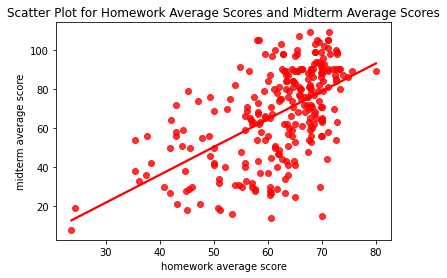

In [ ]:
_ = sns.regplot(x="homework average score", y="midterm average score", data = df_hw_exam, color="r", ci=None)
plt.title("Scatter Plot for Homework Average Scores and Midterm Average Scores")
plt.show()

In [ ]:
# compute the covariance matrix for population
cov_mat = np.cov(df_hw_exam[['homework average score', 'midterm average score']].values, rowvar = False, ddof=0)
cov_mat

array([[ 86.69733705, 123.2383794 ],
       [123.2383794 , 554.20680932]])

In [ ]:
# compute the correlation matrix
cor_mat = np.corrcoef(df_hw_exam[['homework average score', 'midterm average score']].values, rowvar = False)
cor_mat

array([[1.        , 0.56222114],
       [0.56222114, 1.        ]])

### **分析結果與推論**

作業平均與考試平均的相關係數約為 0.56，故有 **中強度的正向線性關係（moderately strong positive linear relationship）。**

## **Q2 : 作業繳交越多次，考試成績會越好嗎？**

此項目分析學生作業上傳次數與考試的關係，分別分析了「總繳交次數」、「AC 前繳交次數」、「AC 後繳交次數」三個子項目。

### **1. 總繳交次數**

#### **資料敘述統計**

In [ ]:
df9 = pd.read_excel('data/Stat_2021_a_2_SubmissionCount.xlsx', sheet_name = "Ave")

print('Head of dataset:')
display(df9.head())

Head of dataset:


,Type,Average,before,after
0,High-High,8.000000,7.333333,8.8
1,High-High,31.000000,27.500000,35.2
2,High-High,9.545455,8.833333,10.4
3,High-High,8.181818,9.166667,7.0
4,High-High,12.909091,6.000000,21.2


此份檔案為學生平均一份作業繳交的次數，包含四個欄位：

分別是 Type（學生屬於哪個群體）、Average（整學期中平均一份作業繳交的次數）、before（第一次期中前平均一份作業繳交的次數）、after（第二次期中前平均一份作業繳交的次數）。

In [ ]:
df9.describe()

,Average,before,after
count,241.000000,241.000000,241.000000
mean,15.763863,13.097510,18.963485
std,11.291733,7.145192,18.492223
min,2.000000,3.500000,0.200000
25%,9.090909,8.333333,8.600000
50%,12.181818,11.000000,13.600000
75%,19.545455,16.333333,22.400000
max,104.636364,57.833333,160.800000


我們可以發現，整學期中平均一份作業繳交的次數的平均約為 16 次，第一次期中前平均約僅為 13 次，第二次期中前則增為 18 次。第一次期中前的標準差也有增加，由 7.145192 增為 18.492223。

#### **資料視覺化**

#### i. 整學期平均繳交次數

學期中所有作業，總共10次，下圖為各分群學生平均一份作業的繳交次數。

Text(0.5, 1.0, 'Box Plot for Homework Average Submission Times')

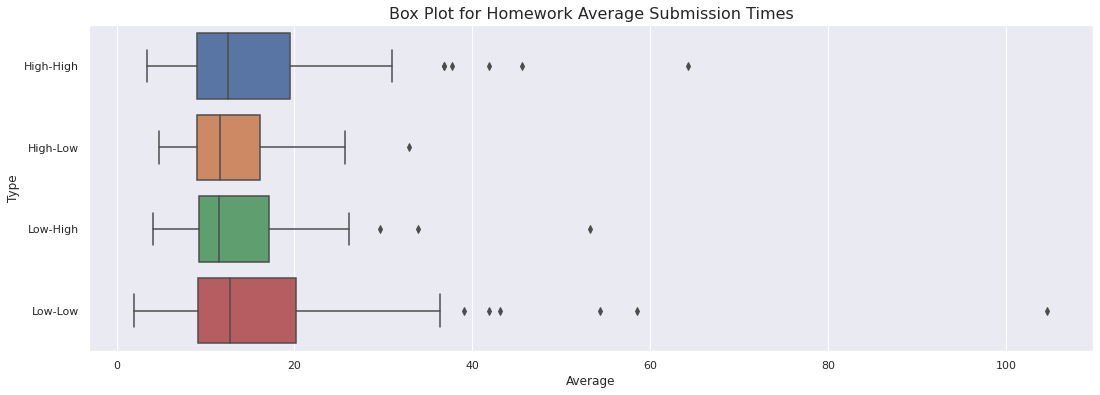

In [ ]:
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize': (18, 6)})
# ax = sns.boxplot(x=['hh', 'hl', 'lh', 'll'], y = [hh_before.Result, hl_before.Result, lh_before.Result, ll_before.Result], whis=1.5)
ax = sns.boxplot(x=df9["Average"], y=df9["Type"], whis=1.5)
plt.title("Box Plot for Homework Average Submission Times", fontsize = 16)

#### **分析結果與推論**
我們原本預測低分群的繳交次數會較少，但結果發現低低群是所有群體中次數最多的，因此**作業繳交次數越多，考試成績不一定比較好。**

#### ii. 第一次期中考前的平均繳交次數

下圖為第一次期中考前，各分群學生平均一份作業的繳交次數。

Text(0.5, 1.0, 'Box plot for HW0-HW4 Submission times')

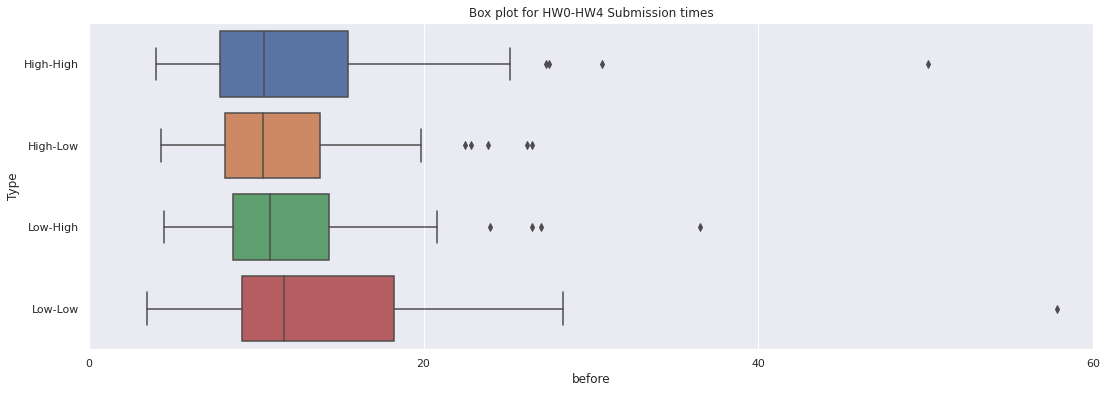

In [ ]:
# 讓x軸的值一樣的話長這樣

sns.set(style="whitegrid")
sns.set(rc={'figure.figsize': (18, 6)})
# ax = sns.boxplot(x=['hh', 'hl', 'lh', 'll'], y = [hh_before.Result, hl_before.Result, lh_before.Result, ll_before.Result], whis=1.5)
ax = sns.boxplot(x=df9["before"], y=df9["Type"], whis=1.5)

plt.xticks([0, 20, 40, 60, 80])
ax.set_xlim([0, 60])
plt.title('Box plot for HW0-HW4 Submission times')

#### iii. 第二次期中考前的平均繳交次數

下圖為第二次期中考前，各分群學生平均一份作業的繳交次數。

Text(0.5, 1.0, 'Box Plot for HW5-HW10 Submission times')

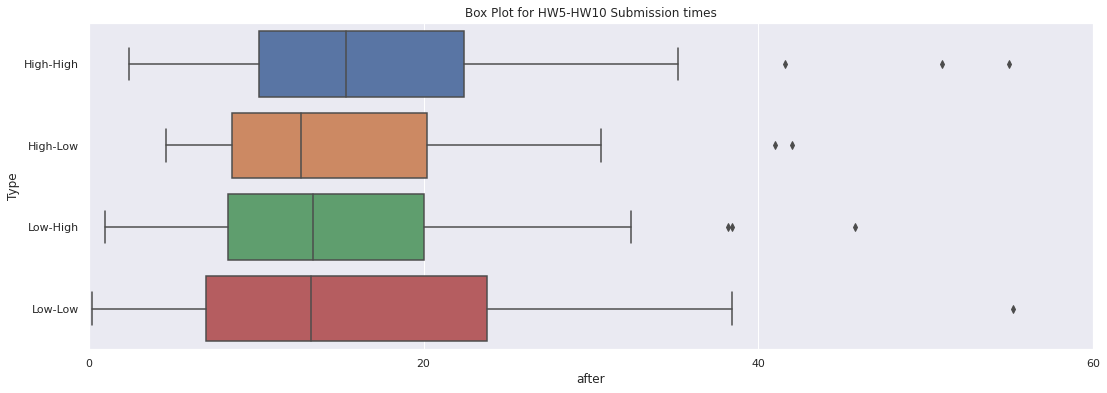

In [ ]:
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize': (18, 6)})
# ax = sns.boxplot(x=['hh', 'hl', 'lh', 'll'], y = [hh_before.Result, hl_before.Result, lh_before.Result, ll_before.Result], whis=1.5)
ax = sns.boxplot(x=df9["after"], y=df9["Type"], whis=1.5)

plt.xticks([0, 20, 40, 60, 80])
ax.set_xlim([0, 60])
plt.title('Box Plot for HW5-HW10 Submission times')

#### **分析結果與推論**

1. 從上兩張 Box Plot 可以發現，期中前、期中後各群體間的差異不大，但期中後所有群體的繳交次數皆上升，我們推測是由期中後的課程及作業難度提升所造成。
2. 低低群在期中前與期中後的 Q3 - Q1（四分位距）都是所有群體中最大的，因此我們推測原低低群同時存在徹底放棄的人和很努力但還是考不好的人，造成群體內行為差異大。 
3. 我們原本預測高低群及低低群（在第二次期中都屬於低分群者）的繳交次數，在第二次期中前會減少，但結果發現並不是。因此，除了作業難度提升外，我們推測低分群多數還是有努力寫作業，造成考試考不好的原因可能是其他因素，如：天份、運氣、臨場反應、作業抄襲等。

### **2. AC 前繳交次數**

#### i. 第一次期中考前，AC 前的繳交次數

#### **資料敘述統計**

In [ ]:
submission_108 = pd.read_csv('data/Stat_2021_a_2_PD108_SubmissionStat.csv')
submission_108

,account_id,submission_id,challenge_id,challenge_title,problem_id,problem_title,verdict
0,57,238225,179,PD108-1 HW0,541,HW0-Problem1,WRONG ANSWER
1,57,238596,179,PD108-1 HW0,541,HW0-Problem1,ACCEPTED
2,57,238608,180,PD108-1 HW1,542,HW1-Problem1,WRONG ANSWER
3,57,238609,180,PD108-1 HW1,543,HW1-Problem2,ACCEPTED
4,57,238610,180,PD108-1 HW1,544,HW1-Problem3,ACCEPTED
...,...,...,...,...,...,...,...
14905,2099,294230,191,PD108-1 HW10,574,HW10-Problem1,WRONG ANSWER
14906,2099,294231,191,PD108-1 HW10,574,HW10-Problem1,WRONG ANSWER
14907,2099,294290,191,PD108-1 HW10,574,HW10-Problem1,WRONG ANSWER
14908,2099,294293,191,PD108-1 HW10,574,HW10-Problem1,ACCEPTED


In [ ]:
submission_109 = pd.read_csv('data/Stat_2021_a_2_PD109_SubmissionStat.csv')
submission_109

,account_id,submission_id,challenge_id,challenge_title,problem_id,problem_title,verdict
0,14,346455,238,PD109-1 HW0,706,HW0-Problem1,ACCEPTED
1,14,346456,238,PD109-1 HW0,706,HW0-Problem1,WRONG ANSWER
2,175,346349,238,PD109-1 HW0,706,HW0-Problem1,ACCEPTED
3,175,349343,239,PD109-1 HW1,707,HW1-Problem1,ACCEPTED
4,175,349352,239,PD109-1 HW1,708,HW1-Problem2,ACCEPTED
...,...,...,...,...,...,...,...
38890,3669,523995,245,PD109-1 HW7,728,HW7-Problem3,ACCEPTED
38891,3669,523997,245,PD109-1 HW7,729,HW7-Problem4,ACCEPTED
38892,3669,523986,246,PD109-1 HW8,730,HW8-Problem1,COMPILE ERROR
38893,3669,525379,246,PD109-1 HW8,730,HW8-Problem1,ACCEPTED


In [ ]:
problem_id_108_series = submission_108.problem_id.drop_duplicates()
problem_df_108 = pd.DataFrame(problem_id_108_series, columns=['problem_id'])

problem_df_108['problem_name'] = ['Q0-1', 'Q1-1', 'Q1-2', 'Q1-3', 'Q2-1',
                                  'Q2-2', 'Q2-3', 'Q3-1', 'Q3-2', 'Q3-3',
                                  'Q4-1', 'Q4-2', 'Q4-3', 'Q5-1', 'Q5-2',
                                  'Q5-3', 'Q8-1', 'Q8-2', 'Q8-3', 'Q9-1',
                                  'Q6-1', 'Q6-2', 'Q6-3', 'Q7-1', 'Q7-2',
                                  'Q7-3', 'Q7-4', 'Q9-2', 'Q10-1', 'Q10-2']
problem_df_108 = problem_df_108.sort_values('problem_id')

In [ ]:
problem_id_109_series = submission_109.problem_id.drop_duplicates()
problem_df_109 = pd.DataFrame(problem_id_109_series, columns=['problem_id'])

problem_df_109['problem_name'] = ['Q0-1', 'Q1-1', 'Q1-2', 'Q1-3', 'Q1-4',
                                  'Q2-1', 'Q2-2', 'Q2-3', 'Q2-4', 'Q3-1',
                                  'Q3-2', 'Q3-3', 'Q4-2', 'Q4-3', 'Q4-1',
                                  'Q5-2', 'Q5-3', 'Q6-3', 'Q6-1', 'Q6-2',
                                  'Q7-1', 'Q7-2', 'Q7-3', 'Q8-1', 'Q8-2',
                                  'Q8-3', 'Q9-1', 'Q9-2', 'Q10-1', 'Q10-2',
                                  'Q7-4', 'Q9-3']
problem_df_109 = problem_df_109.sort_values('problem_id')

In [ ]:
hh108_before_AC_df = pd.DataFrame(columns=['Q0-1', 'Q1-1', 'Q1-2', 'Q1-3', 'Q2-1',
                                           'Q2-2', 'Q2-3', 'Q3-1', 'Q3-2', 'Q3-3',
                                           'Q4-1', 'Q4-2', 'Q4-3', 'Q5-1', 'Q5-2',
                                           'Q5-3', 'Q6-1', 'Q6-2', 'Q6-3', 'Q7-1',
                                           'Q7-2', 'Q7-3', 'Q7-4', 'Q8-1', 'Q8-2',
                                           'Q8-3', 'Q9-1', 'Q9-2', 'Q10-1', 'Q10-2'])
hh108_after_AC_df = pd.DataFrame(columns=['Q0-1', 'Q1-1', 'Q1-2', 'Q1-3', 'Q2-1',
                                          'Q2-2', 'Q2-3', 'Q3-1', 'Q3-2', 'Q3-3',
                                          'Q4-1', 'Q4-2', 'Q4-3', 'Q5-1', 'Q5-2',
                                          'Q5-3', 'Q6-1', 'Q6-2', 'Q6-3', 'Q7-1',
                                          'Q7-2', 'Q7-3', 'Q7-4', 'Q8-1', 'Q8-2',
                                          'Q8-3', 'Q9-1', 'Q9-2', 'Q10-1', 'Q10-2'])
hh109_before_AC_df = pd.DataFrame(columns=['Q0-1', 'Q1-1', 'Q1-2', 'Q1-3', 'Q1-4',
                                           'Q2-1', 'Q2-2', 'Q2-3', 'Q2-4', 'Q3-1',
                                           'Q3-2', 'Q3-3', 'Q4-1', 'Q4-2', 'Q4-3',
                                           'Q5-2', 'Q5-3', 'Q6-1', 'Q6-2', 'Q6-3',
                                           'Q7-1', 'Q7-2', 'Q7-3', 'Q7-4', 'Q8-1',
                                           'Q8-2', 'Q8-3', 'Q9-1', 'Q9-2', 'Q9-3', 
                                           'Q10-1', 'Q10-2'])
hh109_after_AC_df = pd.DataFrame(columns=['Q0-1', 'Q1-1', 'Q1-2', 'Q1-3', 'Q1-4',
                                          'Q2-1', 'Q2-2', 'Q2-3', 'Q2-4', 'Q3-1',
                                          'Q3-2', 'Q3-3', 'Q4-1', 'Q4-2', 'Q4-3',
                                          'Q5-2', 'Q5-3', 'Q6-1', 'Q6-2', 'Q6-3',
                                          'Q7-1', 'Q7-2', 'Q7-3', 'Q7-4', 'Q8-1',
                                          'Q8-2', 'Q8-3', 'Q9-1', 'Q9-2', 'Q9-3', 
                                          'Q10-1', 'Q10-2'])

In [ ]:
gen_before_and_after_df(problem_df=problem_df_108, account_column=df108_high_high.account_id, submission_df=submission_108, before_df=hh108_before_AC_df, after_df=hh108_after_AC_df)
hh108_before_AC_df = problem_to_challenge_108(hh108_before_AC_df)
hh108_after_AC_df = problem_to_challenge_108(hh108_after_AC_df)

gen_before_and_after_df(problem_df=problem_df_109, account_column=df109_high_high.account_id, submission_df=submission_109, before_df=hh109_before_AC_df, after_df=hh109_after_AC_df)
hh109_before_AC_df = problem_to_challenge_109(hh109_before_AC_df)
hh109_after_AC_df = problem_to_challenge_109(hh109_after_AC_df)

done
done


In [ ]:
hh_before = pd.merge(hh108_before_AC_df, hh109_before_AC_df, how='outer')
# histogram_for_AC(column=hh_before['Result'], title='High-High\'s average submit times per challenge before getting AC\n', xlabel='Submit times per challenge before AC')
hh_before

,HW0,HW1,HW2,HW3,HW4,HW5,HW6,HW7,HW8,HW9,HW10,firstHalf,secondHalf
0,2.0,0.333333,1.333333,0.000000,0.000000,2.333333,2.333333,7.50,7.666667,0.500000,1.0,0.733333,3.555556
1,0.0,0.000000,2.333333,0.333333,1.000000,2.333333,4.000000,0.50,1.333333,3.500000,2.5,0.733333,2.361111
2,3.0,0.000000,0.333333,0.000000,0.333333,0.333333,3.000000,0.75,7.666667,0.500000,0.5,0.733333,2.125000
3,0.0,1.000000,0.000000,1.333333,0.000000,0.333333,0.000000,0.00,1.000000,0.000000,1.0,0.466667,0.388889
4,0.0,0.000000,1.000000,1.333333,0.333333,4.333333,0.000000,2.75,8.000000,1.500000,6.5,0.533333,3.847222
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,2.0,0.750000,1.250000,27.666667,3.000000,15.500000,1.666667,1.25,0.000000,0.000000,0.0,6.933333,3.069444
70,3.0,0.500000,0.000000,7.666667,23.666667,8.500000,8.333333,15.50,0.000000,5.000000,0.0,6.966667,6.222222
71,8.0,0.250000,1.250000,4.666667,282.333333,19.500000,8.666667,9.50,12.333333,0.000000,0.0,59.300000,8.333333
72,1.0,0.250000,1.500000,7.000000,6.000000,1.500000,13.000000,1.00,0.000000,1.333333,1.0,3.150000,2.972222


In [ ]:
hh_after = pd.merge(hh108_after_AC_df, hh109_after_AC_df, how='outer')

In [ ]:
hl108_before_AC_df = pd.DataFrame(columns=['Q0-1', 'Q1-1', 'Q1-2', 'Q1-3', 'Q2-1',
                                           'Q2-2', 'Q2-3', 'Q3-1', 'Q3-2', 'Q3-3',
                                           'Q4-1', 'Q4-2', 'Q4-3', 'Q5-1', 'Q5-2',
                                           'Q5-3', 'Q6-1', 'Q6-2', 'Q6-3', 'Q7-1',
                                           'Q7-2', 'Q7-3', 'Q7-4', 'Q8-1', 'Q8-2',
                                           'Q8-3', 'Q9-1', 'Q9-2', 'Q10-1', 'Q10-2'])
hl108_after_AC_df = pd.DataFrame(columns=['Q0-1', 'Q1-1', 'Q1-2', 'Q1-3', 'Q2-1',
                                          'Q2-2', 'Q2-3', 'Q3-1', 'Q3-2', 'Q3-3',
                                          'Q4-1', 'Q4-2', 'Q4-3', 'Q5-1', 'Q5-2',
                                          'Q5-3', 'Q6-1', 'Q6-2', 'Q6-3', 'Q7-1',
                                          'Q7-2', 'Q7-3', 'Q7-4', 'Q8-1', 'Q8-2',
                                          'Q8-3', 'Q9-1', 'Q9-2', 'Q10-1', 'Q10-2'])
hl109_before_AC_df = pd.DataFrame(columns=['Q0-1', 'Q1-1', 'Q1-2', 'Q1-3', 'Q1-4',
                                           'Q2-1', 'Q2-2', 'Q2-3', 'Q2-4', 'Q3-1',
                                           'Q3-2', 'Q3-3', 'Q4-1', 'Q4-2', 'Q4-3',
                                           'Q5-2', 'Q5-3', 'Q6-1', 'Q6-2', 'Q6-3',
                                           'Q7-1', 'Q7-2', 'Q7-3', 'Q7-4', 'Q8-1',
                                           'Q8-2', 'Q8-3', 'Q9-1', 'Q9-2', 'Q9-3', 
                                           'Q10-1', 'Q10-2'])
hl109_after_AC_df = pd.DataFrame(columns=['Q0-1', 'Q1-1', 'Q1-2', 'Q1-3', 'Q1-4',
                                          'Q2-1', 'Q2-2', 'Q2-3', 'Q2-4', 'Q3-1',
                                          'Q3-2', 'Q3-3', 'Q4-1', 'Q4-2', 'Q4-3',
                                          'Q5-2', 'Q5-3', 'Q6-1', 'Q6-2', 'Q6-3',
                                          'Q7-1', 'Q7-2', 'Q7-3', 'Q7-4', 'Q8-1',
                                          'Q8-2', 'Q8-3', 'Q9-1', 'Q9-2', 'Q9-3', 
                                          'Q10-1', 'Q10-2'])

In [ ]:
gen_before_and_after_df(problem_df=problem_df_108, account_column=df108_high_low.account_id, submission_df=submission_108, before_df=hl108_before_AC_df, after_df=hl108_after_AC_df)
hl108_before_AC_df = problem_to_challenge_108(hl108_before_AC_df)
hl108_after_AC_df = problem_to_challenge_108(hl108_after_AC_df)

gen_before_and_after_df(problem_df=problem_df_109, account_column=df109_high_low.account_id, submission_df=submission_109, before_df=hl109_before_AC_df, after_df=hl109_after_AC_df)
hl109_before_AC_df = problem_to_challenge_109(hl109_before_AC_df)
hl109_after_AC_df = problem_to_challenge_109(hl109_after_AC_df)

done
done


In [ ]:
hl_before = pd.merge(hl108_before_AC_df, hl109_before_AC_df, how='outer')

In [ ]:
hl_after = pd.merge(hl108_after_AC_df, hl109_after_AC_df, how='outer')

In [ ]:
lh108_before_AC_df = pd.DataFrame(columns=['Q0-1', 'Q1-1', 'Q1-2', 'Q1-3', 'Q2-1',
                                           'Q2-2', 'Q2-3', 'Q3-1', 'Q3-2', 'Q3-3',
                                           'Q4-1', 'Q4-2', 'Q4-3', 'Q5-1', 'Q5-2',
                                           'Q5-3', 'Q6-1', 'Q6-2', 'Q6-3', 'Q7-1',
                                           'Q7-2', 'Q7-3', 'Q7-4', 'Q8-1', 'Q8-2',
                                           'Q8-3', 'Q9-1', 'Q9-2', 'Q10-1', 'Q10-2'])
lh108_after_AC_df = pd.DataFrame(columns=['Q0-1', 'Q1-1', 'Q1-2', 'Q1-3', 'Q2-1',
                                          'Q2-2', 'Q2-3', 'Q3-1', 'Q3-2', 'Q3-3',
                                          'Q4-1', 'Q4-2', 'Q4-3', 'Q5-1', 'Q5-2',
                                          'Q5-3', 'Q6-1', 'Q6-2', 'Q6-3', 'Q7-1',
                                          'Q7-2', 'Q7-3', 'Q7-4', 'Q8-1', 'Q8-2',
                                          'Q8-3', 'Q9-1', 'Q9-2', 'Q10-1', 'Q10-2'])
lh109_before_AC_df = pd.DataFrame(columns=['Q0-1', 'Q1-1', 'Q1-2', 'Q1-3', 'Q1-4',
                                           'Q2-1', 'Q2-2', 'Q2-3', 'Q2-4', 'Q3-1',
                                           'Q3-2', 'Q3-3', 'Q4-1', 'Q4-2', 'Q4-3',
                                           'Q5-2', 'Q5-3', 'Q6-1', 'Q6-2', 'Q6-3',
                                           'Q7-1', 'Q7-2', 'Q7-3', 'Q7-4', 'Q8-1',
                                           'Q8-2', 'Q8-3', 'Q9-1', 'Q9-2', 'Q9-3', 
                                           'Q10-1', 'Q10-2'])
lh109_after_AC_df = pd.DataFrame(columns=['Q0-1', 'Q1-1', 'Q1-2', 'Q1-3', 'Q1-4',
                                          'Q2-1', 'Q2-2', 'Q2-3', 'Q2-4', 'Q3-1',
                                          'Q3-2', 'Q3-3', 'Q4-1', 'Q4-2', 'Q4-3',
                                          'Q5-2', 'Q5-3', 'Q6-1', 'Q6-2', 'Q6-3',
                                          'Q7-1', 'Q7-2', 'Q7-3', 'Q7-4', 'Q8-1',
                                          'Q8-2', 'Q8-3', 'Q9-1', 'Q9-2', 'Q9-3', 
                                          'Q10-1', 'Q10-2'])

In [ ]:
gen_before_and_after_df(problem_df=problem_df_108, account_column=df108_low_high.account_id, submission_df=submission_108, before_df=lh108_before_AC_df, after_df=lh108_after_AC_df)
lh108_before_AC_df = problem_to_challenge_108(lh108_before_AC_df)
lh108_after_AC_df = problem_to_challenge_108(lh108_after_AC_df)

gen_before_and_after_df(problem_df=problem_df_109, account_column=df109_low_high.account_id, submission_df=submission_109, before_df=lh109_before_AC_df, after_df=lh109_after_AC_df)
lh109_before_AC_df = problem_to_challenge_109(lh109_before_AC_df)
lh109_after_AC_df = problem_to_challenge_109(lh109_after_AC_df)

done
done


In [ ]:
lh_before = pd.merge(lh108_before_AC_df, lh109_before_AC_df, how='outer')

In [ ]:
lh_after = pd.merge(lh108_after_AC_df, lh109_after_AC_df, how='outer')

In [ ]:
df108_mid1_score = pd.read_csv('data/Stat_2021_a_2_PD108_midterm1_score.csv')
df108_mid2_score = pd.read_csv('data/Stat_2021_a_2_PD108_midterm2_score.csv')
df108_score = pd.merge(df108_mid1_score, df108_mid2_score, how='outer', on='account_id').dropna()
df108_score = df108_score[(df108_score['account_id'] != 57) & (df108_score['account_id'] != 75) & (df108_score['account_id'] != 1285) & (df108_score['account_id'] != 1758)]

# grouping and save account ids
df108_high_high = df108_score[(df108_score['score_x'] >= 72) & (df108_score['score_y'] >= 70)]
df108_high_low = df108_score[(df108_score['score_x'] >= 72) & (df108_score['score_y'] < 70)]
df108_low_high = df108_score[(df108_score['score_x'] < 72) & (df108_score['score_y'] >= 70)]
df108_low_low = df108_score[(df108_score['score_x'] < 72) & (df108_score['score_y'] < 70)]

In [ ]:
ll108_before_AC_df = pd.DataFrame(columns=['Q0-1', 'Q1-1', 'Q1-2', 'Q1-3', 'Q2-1',
                                           'Q2-2', 'Q2-3', 'Q3-1', 'Q3-2', 'Q3-3',
                                           'Q4-1', 'Q4-2', 'Q4-3', 'Q5-1', 'Q5-2',
                                           'Q5-3', 'Q6-1', 'Q6-2', 'Q6-3', 'Q7-1',
                                           'Q7-2', 'Q7-3', 'Q7-4', 'Q8-1', 'Q8-2',
                                           'Q8-3', 'Q9-1', 'Q9-2', 'Q10-1', 'Q10-2'])
ll108_after_AC_df = pd.DataFrame(columns=['Q0-1', 'Q1-1', 'Q1-2', 'Q1-3', 'Q2-1',
                                          'Q2-2', 'Q2-3', 'Q3-1', 'Q3-2', 'Q3-3',
                                          'Q4-1', 'Q4-2', 'Q4-3', 'Q5-1', 'Q5-2',
                                          'Q5-3', 'Q6-1', 'Q6-2', 'Q6-3', 'Q7-1',
                                          'Q7-2', 'Q7-3', 'Q7-4', 'Q8-1', 'Q8-2',
                                          'Q8-3', 'Q9-1', 'Q9-2', 'Q10-1', 'Q10-2'])
ll109_before_AC_df = pd.DataFrame(columns=['Q0-1', 'Q1-1', 'Q1-2', 'Q1-3', 'Q1-4',
                                           'Q2-1', 'Q2-2', 'Q2-3', 'Q2-4', 'Q3-1',
                                           'Q3-2', 'Q3-3', 'Q4-1', 'Q4-2', 'Q4-3',
                                           'Q5-2', 'Q5-3', 'Q6-1', 'Q6-2', 'Q6-3',
                                           'Q7-1', 'Q7-2', 'Q7-3', 'Q7-4', 'Q8-1',
                                           'Q8-2', 'Q8-3', 'Q9-1', 'Q9-2', 'Q9-3', 
                                           'Q10-1', 'Q10-2'])
ll109_after_AC_df = pd.DataFrame(columns=['Q0-1', 'Q1-1', 'Q1-2', 'Q1-3', 'Q1-4',
                                          'Q2-1', 'Q2-2', 'Q2-3', 'Q2-4', 'Q3-1',
                                          'Q3-2', 'Q3-3', 'Q4-1', 'Q4-2', 'Q4-3',
                                          'Q5-2', 'Q5-3', 'Q6-1', 'Q6-2', 'Q6-3',
                                          'Q7-1', 'Q7-2', 'Q7-3', 'Q7-4', 'Q8-1',
                                          'Q8-2', 'Q8-3', 'Q9-1', 'Q9-2', 'Q9-3', 
                                          'Q10-1', 'Q10-2'])


In [ ]:
gen_before_and_after_df(problem_df=problem_df_108, account_column=df108_low_low.account_id, submission_df=submission_108, before_df=ll108_before_AC_df, after_df=ll108_after_AC_df)
ll108_before_AC_df = problem_to_challenge_108(ll108_before_AC_df)
ll108_after_AC_df = problem_to_challenge_108(ll108_after_AC_df)

gen_before_and_after_df(problem_df=problem_df_109, account_column=df109_low_low.account_id, submission_df=submission_109, before_df=ll109_before_AC_df, after_df=ll109_after_AC_df)
ll109_before_AC_df = problem_to_challenge_109(ll109_before_AC_df)
ll109_after_AC_df = problem_to_challenge_109(ll109_after_AC_df)

done
done


In [ ]:
ll_before = pd.merge(ll108_before_AC_df, ll109_before_AC_df, how='outer')

In [ ]:
ll_after = pd.merge(ll108_after_AC_df, ll109_after_AC_df, how='outer')

In [ ]:
df108_mid1_score = pd.read_csv('data/Stat_2021_a_2_PD108_midterm1_score.csv')
df108_mid2_score = pd.read_csv('data/Stat_2021_a_2_PD108_midterm2_score.csv')
df108_score = pd.merge(df108_mid1_score, df108_mid2_score, how='outer', on='account_id').dropna()
df108_score = df108_score[(df108_score['account_id'] != 57) & (df108_score['account_id'] != 75) & (df108_score['account_id'] != 1285) & (df108_score['account_id'] != 1758)]

# grouping and save account ids
df108_high_high = df108_score[(df108_score['score_x'] >= 72) & (df108_score['score_y'] >= 70)]
df108_high_low = df108_score[(df108_score['score_x'] >= 72) & (df108_score['score_y'] < 70)]
df108_low_high = df108_score[(df108_score['score_x'] < 72) & (df108_score['score_y'] >= 70)]
df108_low_low = df108_score[(df108_score['score_x'] < 72) & (df108_score['score_y'] < 70)]

In [ ]:
before_HW0_4 = pd.DataFrame(columns=['type', 'sub_times'])
before_HW5_10 = pd.DataFrame(columns=['type', 'sub_times'])

hh_before_fh = pd.DataFrame(columns=['type', 'sub_times'])
hh_before_fh['sub_times'] = hh_before.firstHalf
hh_before_fh['type'] = 'hh'

hl_before_fh = pd.DataFrame(columns=['type', 'sub_times'])
hl_before_fh['sub_times'] = hl_before.firstHalf
hl_before_fh['type'] = 'hl'

lh_before_fh = pd.DataFrame(columns=['type', 'sub_times'])
lh_before_fh['sub_times'] = lh_before.firstHalf
lh_before_fh['type'] = 'lh'

ll_before_fh = pd.DataFrame(columns=['type', 'sub_times'])
ll_before_fh['sub_times'] = ll_before.firstHalf
ll_before_fh['type'] = 'll'

before_HW0_4 = before_HW0_4.append(hh_before_fh, ignore_index=True)
before_HW0_4 = before_HW0_4.append(hl_before_fh, ignore_index=True)
before_HW0_4 = before_HW0_4.append(lh_before_fh, ignore_index=True)
before_HW0_4 = before_HW0_4.append(ll_before_fh, ignore_index=True)
before_HW0_4

,type,sub_times
0,hh,0.733333
1,hh,0.733333
2,hh,0.733333
3,hh,0.466667
4,hh,0.533333
...,...,...
238,ll,2.350000
239,ll,3.216667
240,ll,1.083333
241,ll,2.250000


In [ ]:
before_HW0_4.describe()

,sub_times
count,243.000000
mean,2.487929
std,4.082170
min,0.133333
25%,0.908333
50%,1.766667
75%,3.083333
max,59.300000


#### **資料視覺化**

Text(0.5, 1.0, 'HW0-HW4 Submission Times before first AC')

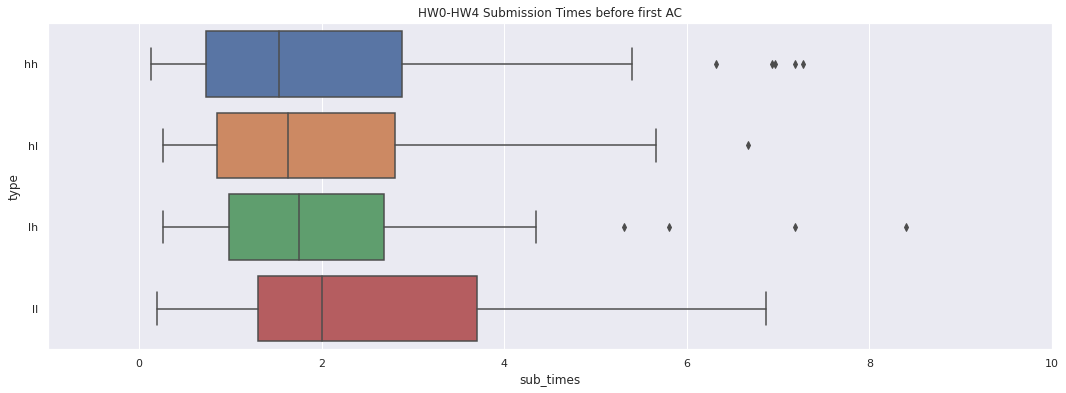

In [ ]:
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize': (18, 6)})
ax = sns.boxplot(x=before_HW0_4.sub_times, y=before_HW0_4.type, whis=1.5)
ax.set_xlim([-1, 10])
plt.title('HW0-HW4 Submission Times before first AC')

#### ii. 第二次期中考前，AC 前的繳交次數

#### **資料敘述統計**

In [ ]:
before_HW5_10 = pd.DataFrame(columns=['type', 'sub_times'])

hh_before_sh = pd.DataFrame(columns=['type', 'sub_times'])
hh_before_sh['sub_times'] = hh_before.secondHalf
hh_before_sh['type'] = 'hh'

hl_before_sh = pd.DataFrame(columns=['type', 'sub_times'])
hl_before_sh['sub_times'] = hl_before.secondHalf
hl_before_sh['type'] = 'hl'

lh_before_sh = pd.DataFrame(columns=['type', 'sub_times'])
lh_before_sh['sub_times'] = lh_before.secondHalf
lh_before_sh['type'] = 'lh'

ll_before_sh = pd.DataFrame(columns=['type', 'sub_times'])
ll_before_sh['sub_times'] = ll_before.secondHalf
ll_before_sh['type'] = 'll'

before_HW5_10 = before_HW5_10.append(hh_before_sh, ignore_index=True)
before_HW5_10 = before_HW5_10.append(hl_before_sh, ignore_index=True)
before_HW5_10 = before_HW5_10.append(lh_before_sh, ignore_index=True)
before_HW5_10 = before_HW5_10.append(ll_before_sh, ignore_index=True)
before_HW5_10

,type,sub_times
0,hh,3.555556
1,hh,2.361111
2,hh,2.125000
3,hh,0.388889
4,hh,3.847222
...,...,...
238,ll,6.694444
239,ll,0.666667
240,ll,0.722222
241,ll,6.513889


In [ ]:
before_HW5_10.describe()

,sub_times
count,243.000000
mean,3.550812
std,4.331779
min,0.000000
25%,1.305556
50%,2.361111
75%,4.250000
max,37.458333


#### **資料視覺化**

Text(0.5, 1.0, 'HW5-HW10 Submission Times before first AC')

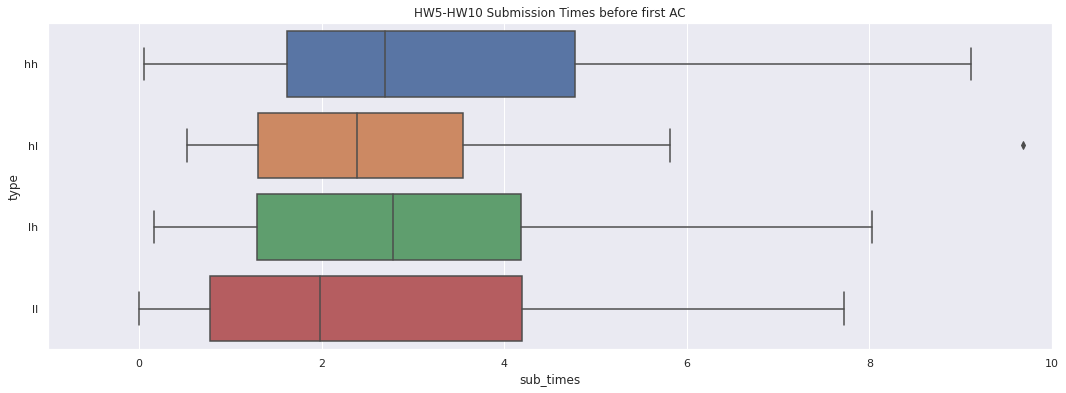

In [ ]:
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize': (18, 6)})
ax = sns.boxplot(x=before_HW5_10.sub_times, y=before_HW5_10.type, whis=1.5)
ax.set_xlim([-1, 10])
plt.title('HW5-HW10 Submission Times before first AC')

In [ ]:
after_HW0_4 = pd.DataFrame(columns=['type', 'sub_times'])

hh_after_fh = pd.DataFrame(columns=['type', 'sub_times'])
hh_after_fh['sub_times'] = hh_after.firstHalf
hh_after_fh['type'] = 'hh'

hl_after_fh = pd.DataFrame(columns=['type', 'sub_times'])
hl_after_fh['sub_times'] = hl_after.firstHalf
hl_after_fh['type'] = 'hl'

lh_after_fh = pd.DataFrame(columns=['type', 'sub_times'])
lh_after_fh['sub_times'] = lh_after.firstHalf
lh_after_fh['type'] = 'lh'

ll_after_fh = pd.DataFrame(columns=['type', 'sub_times'])
ll_after_fh['sub_times'] = ll_after.firstHalf
ll_after_fh['type'] = 'll'

after_HW0_4 = after_HW0_4.append(hh_after_fh, ignore_index=True)
after_HW0_4 = after_HW0_4.append(hl_after_fh, ignore_index=True)
after_HW0_4 = after_HW0_4.append(lh_after_fh, ignore_index=True)
after_HW0_4 = after_HW0_4.append(ll_after_fh, ignore_index=True)
after_HW0_4

,type,sub_times
0,hh,0.200000
1,hh,0.533333
2,hh,0.666667
3,hh,0.066667
4,hh,0.733333
...,...,...
238,ll,0.116667
239,ll,0.150000
240,ll,0.050000
241,ll,0.450000


### **3. AC 後繳交次數**

#### i. 第一次期中考前，AC 後繳交次數

#### **資料視覺化**

Text(0.5, 1.0, 'HW0-HW4 Submission Times after first AC')

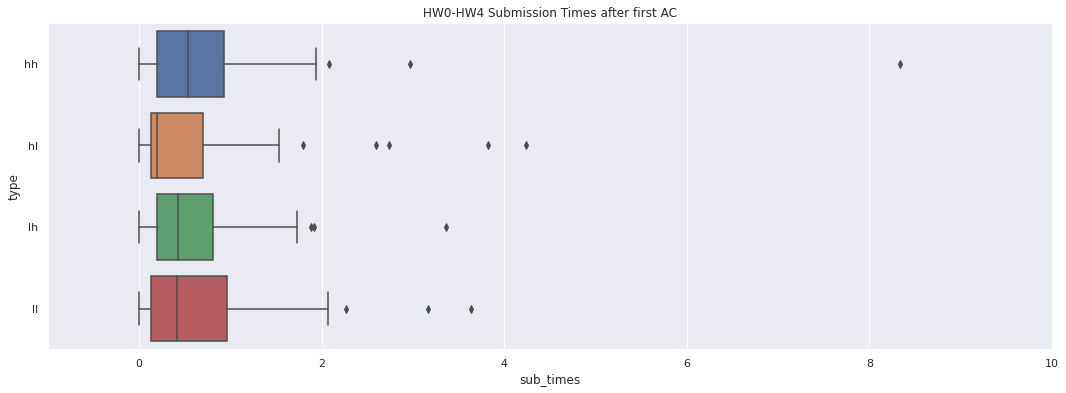

In [ ]:
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize': (18, 6)})
ax = sns.boxplot(x=after_HW0_4.sub_times, y=after_HW0_4.type, whis=1.5)
ax.set_xlim([-1, 10])
plt.title('HW0-HW4 Submission Times after first AC')

In [ ]:
after_HW5_10 = pd.DataFrame(columns=['type', 'sub_times'])

hh_after_sh = pd.DataFrame(columns=['type', 'sub_times'])
hh_after_sh['sub_times'] = hh_after.secondHalf
hh_after_sh['type'] = 'hh'

hl_after_sh = pd.DataFrame(columns=['type', 'sub_times'])
hl_after_sh['sub_times'] = hl_after.secondHalf
hl_after_sh['type'] = 'hl'

lh_after_sh = pd.DataFrame(columns=['type', 'sub_times'])
lh_after_sh['sub_times'] = lh_after.secondHalf
lh_after_sh['type'] = 'lh'

ll_after_sh = pd.DataFrame(columns=['type', 'sub_times'])
ll_after_sh['sub_times'] = ll_after.secondHalf
ll_after_sh['type'] = 'll'

after_HW5_10 = after_HW5_10.append(hh_after_sh, ignore_index=True)
after_HW5_10 = after_HW5_10.append(hl_after_sh, ignore_index=True)
after_HW5_10 = after_HW5_10.append(lh_after_sh, ignore_index=True)
after_HW5_10 = after_HW5_10.append(ll_after_sh, ignore_index=True)
after_HW5_10

,type,sub_times
0,hh,1.430556
1,hh,0.777778
2,hh,2.055556
3,hh,0.111111
4,hh,1.527778
...,...,...
238,ll,1.305556
239,ll,0.000000
240,ll,0.541667
241,ll,0.944444


#### ii. 第二次期中考前，AC 後作業繳交次數

#### **資料視覺化**

Text(0.5, 1.0, 'HW5-HW10 Submission Times after first AC')

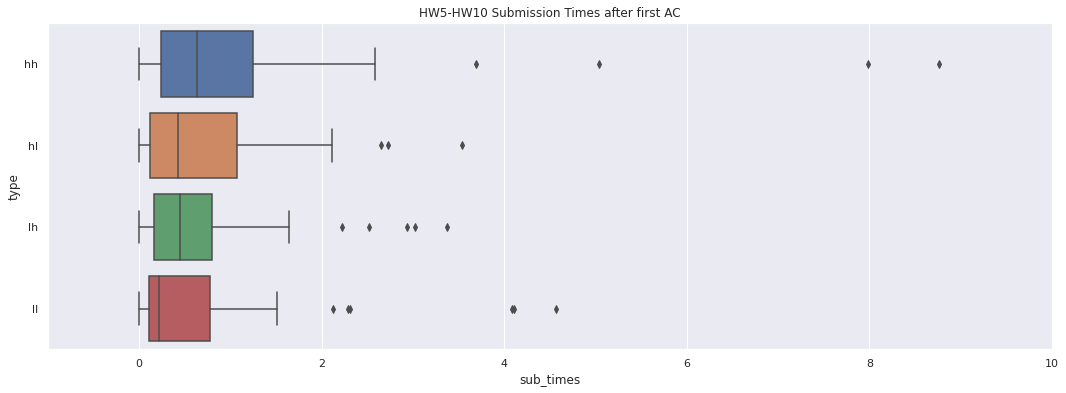

In [ ]:
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize': (18, 6)})
ax = sns.boxplot(x=after_HW5_10.sub_times, y=after_HW5_10.type, whis=1.5)
ax.set_xlim([-1, 10])
plt.title('HW5-HW10 Submission Times after first AC')

#### **分析結果與推論**
##### **AC 前繳交次數的比較**
1. 第一、二次期中前各群體間的差異不大，但期中後所有群體繳交次數皆上升，推測是因為作業難度提高。
2. 低高群的繳交次數上升幅度最大，推測是因為雖然第一次期中前他們屬於低分群，但因為願意嘗試很多次，所以成為他們第二次期中進步的原因之一。 
3. 低低群的 Q3 - Q1（四分位距）在第一、二次期中前都是所有群體中最大的，推測因為低低群同時存在徹底放棄的人和很努力但還是考不好的人。
4. 高低群、低低群（第二次期中皆屬於低分群者）期中後的繳交次數都上升，和我們原先的預想不同，因此我們推測除了難度變高之外，考試考不好的人多數還是有努力寫作業，考不好的原因可能是天份、運氣、臨場反應、作業抄襲等。

##### **AC 後繳交次數比較**
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;AC 後會繼續精進自己的程式碼的一直都是以高高群最多，跟我們原先的猜測相同。



## **Q3 : 死線戰士不分你我？**

此項目分析在作業發布後的0至7天內，每一天的總繳交次數各自是多少。

### **資料視覺化**

In [ ]:
df = pd.read_csv("data/Stat_2021_a_2_PD108_SubmissionTimeStat.csv")

# delete TAs
df = df[(df['account_id'] != 57) & (df['account_id'] != 75) & (df['account_id'] != 1285) & (df['account_id'] != 1758)]

# delete HW07 & HW10 (cuz their duration is two weeks)
df = df[(df['challenge_title'] != 'PD108-1 HW7') & (df['challenge_title'] != 'PD108-1 HW10')]

# transform datatype to datetime
pd.options.mode.chained_assignment = None  # default='warn'
df['challenge_start'] = pd.to_datetime(df['challenge_start'], format="%Y-%m-%d %H:%M:%S")
df['challenge_end'] = pd.to_datetime(df['challenge_end'], format="%Y-%m-%d %H:%M:%S")
df['submit_time'] = pd.to_datetime(df['submit_time'], format="%Y-%m-%d %H:%M:%S")

# get rid of time
df['challenge_start_date'] = df['challenge_start'].dt.date
df['challenge_end_date'] = df['challenge_end'].dt.date
df['submit_time_date'] = df['submit_time'].dt.date

df = df.reset_index()
# count days between challenge start date and submit time date
df['start_days'] = (df['submit_time_date'] - df['challenge_start_date']).dt.days

# delete very late submissions
df108 = df[(df['start_days'] <= 7)]
display(df108.head())

# separate HWs between two midterms
df108_first_half = df108[(df108['challenge_title'] == 'PD108-1 HW0') 
                   | (df108['challenge_title'] == 'PD108-1 HW1')
                   | (df108['challenge_title'] == 'PD108-1 HW2')
                   | (df108['challenge_title'] == 'PD108-1 HW3')
                   | (df108['challenge_title'] == 'PD108-1 HW4')]

df108_second_half = df108[(df108['challenge_title'] == 'PD108-1 HW5') 
                   | (df108['challenge_title'] == 'PD108-1 HW6')
                   | (df108['challenge_title'] == 'PD108-1 HW8')
                   | (df108['challenge_title'] == 'PD108-1 HW9')]

,index,account_id,submission_id,problem_id,challenge_id,challenge_title,submit_time,challenge_start,challenge_end,challenge_start_date,challenge_end_date,submit_time_date,start_days
0,1,1755,237898,541,179,PD108-1 HW0,2019-09-10 21:59:39,2019-09-10 21:00:00,2019-09-17 08:00:00,2019-09-10,2019-09-17,2019-09-10,0
1,2,1755,237903,541,179,PD108-1 HW0,2019-09-10 22:36:58,2019-09-10 21:00:00,2019-09-17 08:00:00,2019-09-10,2019-09-17,2019-09-10,0
2,3,1923,237904,541,179,PD108-1 HW0,2019-09-10 22:56:58,2019-09-10 21:00:00,2019-09-17 08:00:00,2019-09-10,2019-09-17,2019-09-10,0
3,4,1272,237905,541,179,PD108-1 HW0,2019-09-10 23:00:04,2019-09-10 21:00:00,2019-09-17 08:00:00,2019-09-10,2019-09-17,2019-09-10,0
4,5,1272,237906,541,179,PD108-1 HW0,2019-09-10 23:02:05,2019-09-10 21:00:00,2019-09-17 08:00:00,2019-09-10,2019-09-17,2019-09-10,0


In [ ]:
df = pd.read_csv("data/Stat_2021_a_2_PD109_SubmissionTimeStat.csv")

# delete TAs
df = df[(df['account_id'] != 14) & (df['account_id'] != 175) & (df['account_id'] != 1758) & (df['account_id'] != 1767) & (df['account_id'] != 587) & (df['account_id'] != 590) & (df['account_id'] != 707)]

# delete HW04 & HW06 & HW07 & HW08 (cuz their duration is two weeks)
df = df[(df['challenge_title'] != 'PD109-1 HW4') & (df['challenge_title'] != 'PD109-1 HW6') & (df['challenge_title'] != 'PD109-1 HW7') & (df['challenge_title'] != 'PD109-1 HW8')]

# transform datatype to datetime
pd.options.mode.chained_assignment = None  # default='warn'
df['challenge_start'] = pd.to_datetime(df['challenge_start'], format="%Y-%m-%d %H:%M:%S")
df['challenge_end'] = pd.to_datetime(df['challenge_end'], format="%Y-%m-%d %H:%M:%S")
df['submit_time'] = pd.to_datetime(df['submit_time'], format="%Y-%m-%d %H:%M:%S")

# get rid of time
df['challenge_start_date'] = df['challenge_start'].dt.date
df['challenge_end_date'] = df['challenge_end'].dt.date
df['submit_time_date'] = df['submit_time'].dt.date

df = df.reset_index()
# count days between challenge start date and submit time date
df['start_days'] = (df['submit_time_date'] - df['challenge_start_date']).dt.days

# delete very late submissions
df109 = df[(df['start_days'] <= 7)]
display(df109.head())

# separate HWs between two midterms
df109_first_half = df109[(df109['challenge_title'] == 'PD109-1 HW0') 
                   | (df109['challenge_title'] == 'PD109-1 HW1')
                   | (df109['challenge_title'] == 'PD109-1 HW2')
                   | (df109['challenge_title'] == 'PD109-1 HW3')]

df109_second_half = df109[(df109['challenge_title'] == 'PD109-1 HW5') 
                   | (df109['challenge_title'] == 'PD109-1 HW9')
                   | (df109['challenge_title'] == 'PD109-1 HW10')]

,index,account_id,submission_id,problem_id,challenge_id,challenge_title,submit_time,challenge_start,challenge_end,challenge_start_date,challenge_end_date,submit_time_date,start_days
0,16,3311,346492,706,238,PD109-1 HW0,2020-09-15 18:47:49,2020-09-15 18:00:00,2020-09-22 08:00:00,2020-09-15,2020-09-22,2020-09-15,0
1,17,3293,346508,706,238,PD109-1 HW0,2020-09-15 19:19:10,2020-09-15 18:00:00,2020-09-22 08:00:00,2020-09-15,2020-09-22,2020-09-15,0
2,18,3284,346511,706,238,PD109-1 HW0,2020-09-15 19:20:33,2020-09-15 18:00:00,2020-09-22 08:00:00,2020-09-15,2020-09-22,2020-09-15,0
3,19,3284,346512,706,238,PD109-1 HW0,2020-09-15 19:22:39,2020-09-15 18:00:00,2020-09-22 08:00:00,2020-09-15,2020-09-22,2020-09-15,0
4,20,2381,346517,706,238,PD109-1 HW0,2020-09-15 19:36:43,2020-09-15 18:00:00,2020-09-22 08:00:00,2020-09-15,2020-09-22,2020-09-15,0


In [ ]:
df_mid1_score = pd.read_csv("data/Stat_2021_a_2_PD108_midterm1_score.csv")
df_mid2_score = pd.read_csv("data/Stat_2021_a_2_PD108_midterm2_score.csv")
df_score = pd.merge(df_mid1_score, df_mid2_score, how='outer', on='account_id').dropna()
df_score = df_score[(df_score['account_id'] != 57) & (df_score['account_id'] != 75) & (df_score['account_id'] != 1285) & (df_score['account_id'] != 1758)]

# grouping and save account ids
df108_high_high = df_score[(df_score['score_x'] >= 72) & (df_score['score_y'] >= 70)]
df108_high_low = df_score[(df_score['score_x'] >= 72) & (df_score['score_y'] < 70)]
df108_low_high = df_score[(df_score['score_x'] < 72) & (df_score['score_y'] >= 70)]
df108_low_low = df_score[(df_score['score_x'] < 72) & (df_score['score_y'] < 70)]

In [ ]:
# 在 first submission time 中分別取出各群的 submission 紀錄
def refine_group_submission(df, df_high_high, df_high_low, df_low_high, df_low_low):
    df_hh = df[df['account_id'].isin(df_high_high['account_id'])]
    df_hl = df[df['account_id'].isin(df_high_low['account_id'])]
    df_lh = df[df['account_id'].isin(df_low_high['account_id'])]
    df_ll = df[df['account_id'].isin(df_low_low['account_id'])]
    return df_hh, df_hl, df_lh, df_ll

# count frequency of every group
def count_freq_each_group(df_hh, df_hl, df_lh, df_ll):
    df1 = df_hh['start_days'].value_counts().to_frame().sort_index().reset_index()
    df2 = df_hl['start_days'].value_counts().to_frame().sort_index().reset_index()
    df3 = df_lh['start_days'].value_counts().to_frame().sort_index().reset_index()
    df4 = df_ll['start_days'].value_counts().to_frame().sort_index().reset_index()
    return df1, df2, df3, df4

In [ ]:
df_hh, df_hl, df_lh, df_ll = refine_group_submission(df108, df108_high_high, df108_high_low, df108_low_high, df108_low_low)
df108_hh, df108_hl, df108_lh, df108_ll = count_freq_each_group(df_hh, df_hl, df_lh, df_ll)

In [ ]:
df_mid1_score = pd.read_csv("data/Stat_2021_a_2_PD109_midterm1_score.csv")
df_mid2_score = pd.read_csv("data/Stat_2021_a_2_PD109_midterm2_score.csv")
df_score = pd.merge(df_mid1_score, df_mid2_score, how='outer', on='account_id').dropna()
df_score = df_score[(df_score['account_id'] != 14) 
                    & (df_score['account_id'] != 175) 
                    & (df_score['account_id'] != 1758) 
                    & (df_score['account_id'] != 1767) 
                    & (df_score['account_id'] != 587) 
                    & (df_score['account_id'] != 590) 
                    & (df_score['account_id'] != 707)]

# grouping and save account ids
df109_high_high = df_score[(df_score['score_x'] >= 82) & (df_score['score_y'] >= 56)]
df109_high_low = df_score[(df_score['score_x'] >= 82) & (df_score['score_y'] < 56)]
df109_low_high = df_score[(df_score['score_x'] < 82) & (df_score['score_y'] >= 56)]
df109_low_low = df_score[(df_score['score_x'] < 82) & (df_score['score_y'] < 56)]

In [ ]:
df_hh, df_hl, df_lh, df_ll = refine_group_submission(df109, df109_high_high, df109_high_low, df109_low_high, df109_low_low)
df109_hh, df109_hl, df109_lh, df109_ll = count_freq_each_group(df_hh, df_hl, df_lh, df_ll)

In [ ]:
# merge data from PD108 and PD109
def merge_and_generate_start_days(subdf1, subdf2, period):
    df = pd.merge(subdf1, subdf2, how='outer', on='index')
    if period == 1:
        df['start_days_x'] = df['start_days_x'] / 5
        df['start_days_y'] = df['start_days_y'] / 4
    elif period == 2:
        df['start_days_x'] = df['start_days_x'] / 4
        df['start_days_y'] = df['start_days_y'] / 3
    elif period == 0:
        df['start_days_x'] = df['start_days_x'] / 9
        df['start_days_y'] = df['start_days_y'] / 7
    df['start_days'] = (df['start_days_x'] + df['start_days_y']) / 2
    return df

In [ ]:
df_0_hh = merge_and_generate_start_days(df108_hh, df109_hh, 0)

df_0_hl = merge_and_generate_start_days(df108_hl, df109_hl, 0)

df_0_lh = merge_and_generate_start_days(df108_lh, df109_lh, 0)

df_0_ll = merge_and_generate_start_days(df108_ll, df109_ll, 0)

#### 每日作業總繳交次數

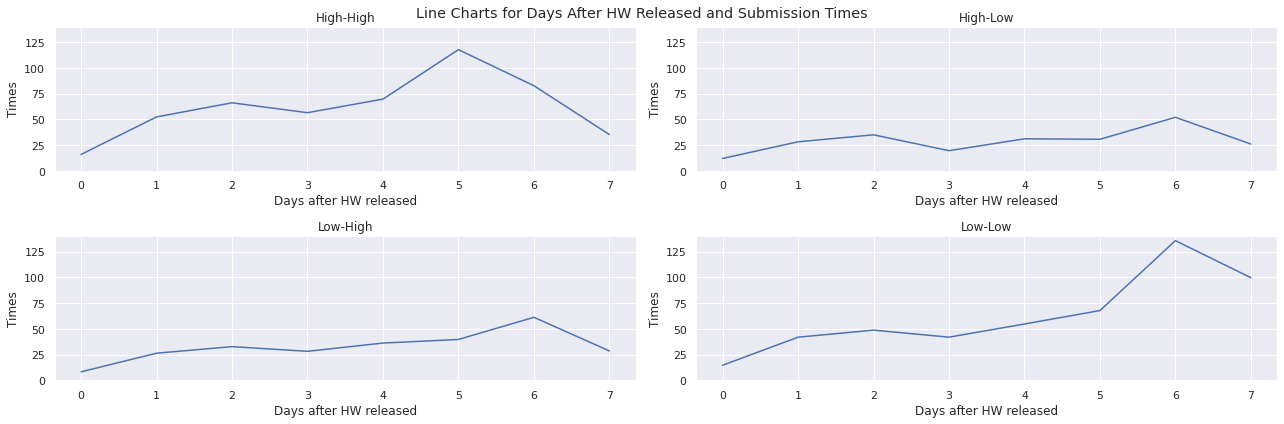

In [ ]:
fig, ax = plt.subplots(2, 2)

ax[0, 0].plot(df_0_hh['index'], df_0_hh['start_days']) #row=0, col=0
ax[1, 0].plot(df_0_lh['index'], df_0_lh['start_days']) #row=1, col=0
ax[0, 1].plot(df_0_hl['index'], df_0_hl['start_days']) #row=0, col=1
ax[1, 1].plot(df_0_ll['index'], df_0_ll['start_days']) #row=1, col=1
ax[0, 0].set_title('High-High')
ax[1, 0].set_title('Low-High')
ax[0, 1].set_title('High-Low')
ax[1, 1].set_title('Low-Low')

for row in ax: 
    for axes in row:
        axes.grid(True)

top_lim = (0 , 140) 
plt.suptitle('Line Charts for Days After HW Released and Submission Times')
plt.setp(ax, xticks=[i for i in df_0_hh['index']], xticklabels=df_0_hh['index'], xlabel='Days after HW released', ylabel='Times', ylim=top_lim)
fig.tight_layout()
plt.show()

### **分析結果與推論**
除了高高群外的三個群體，作業總繳交次數最高峰皆出現在截止日前一天，高高群的最高峰則是在截止日前兩天，因此可知，高高群通常會在死線前預留多一點時間。

## **Q4 : 高分群都超前部署？**

此項目分析在作業發布後的0至7天內，每一天有多少人是第一次上傳自己的作業。

In [ ]:
df = pd.read_csv("data/Stat_2021_a_2_PD108_ChallengeFirstSubmit.csv")
 
# delete TAs
df = df[(df['account_id'] != 57) 
        & (df['account_id'] != 75) 
        & (df['account_id'] != 1285) 
        & (df['account_id'] != 1758)]

# delete HW07 & HW10 (cuz their duration is two weeks)
df = df[(df['challenge_title'] != 'PD108-1 HW7') 
        & (df['challenge_title'] != 'PD108-1 HW10')]

# transform datatype to datetime
pd.options.mode.chained_assignment = None  # default='warn'
df['challenge_start'] = pd.to_datetime(df['challenge_start'], format="%Y-%m-%d %H:%M:%S")
df['challenge_end'] = pd.to_datetime(df['challenge_end'], format="%Y-%m-%d %H:%M:%S")
df['submit_time'] = pd.to_datetime(df['submit_time'], format="%Y-%m-%d %H:%M:%S")

# get rid of time
df['challenge_start_date'] = df['challenge_start'].dt.date
df['challenge_end_date'] = df['challenge_end'].dt.date
df['submit_time_date'] = df['submit_time'].dt.date

df = df.reset_index()
# count days between challenge start date and submit time date
df['start_days'] = (df['submit_time_date'] - df['challenge_start_date']).dt.days

# delete very late submissions
df108 = df[(df['start_days'] <= 7)]
display(df108.head())

# separate HWs between two midterms
df108_first_half = df108[(df108['challenge_title'] == 'PD108-1 HW0') 
                   | (df108['challenge_title'] == 'PD108-1 HW1')
                   | (df108['challenge_title'] == 'PD108-1 HW2')
                   | (df108['challenge_title'] == 'PD108-1 HW3')
                   | (df108['challenge_title'] == 'PD108-1 HW4')]

df108_second_half = df108[(df108['challenge_title'] == 'PD108-1 HW5') 
                   | (df108['challenge_title'] == 'PD108-1 HW6')
                   | (df108['challenge_title'] == 'PD108-1 HW8')
                   | (df108['challenge_title'] == 'PD108-1 HW9')]

,index,account_id,submission_id,challenge_id,challenge_title,submit_time,challenge_start,challenge_end,challenge_start_date,challenge_end_date,submit_time_date,start_days
0,14,641,237977,179,PD108-1 HW0,2019-09-11 02:21:13,2019-09-10 21:00:00,2019-09-17 08:00:00,2019-09-10,2019-09-17,2019-09-11,1
1,15,641,243674,180,PD108-1 HW1,2019-09-22 21:25:20,2019-09-17 18:00:00,2019-09-24 08:00:00,2019-09-17,2019-09-24,2019-09-22,5
2,16,641,248041,181,PD108-1 HW2,2019-09-29 02:07:00,2019-09-24 18:00:00,2019-10-01 08:00:00,2019-09-24,2019-10-01,2019-09-29,5
3,17,641,254760,182,PD108-1 HW3,2019-10-07 14:11:26,2019-10-01 18:00:00,2019-10-08 08:00:00,2019-10-01,2019-10-08,2019-10-07,6
4,18,641,262147,183,PD108-1 HW4,2019-10-14 21:06:21,2019-10-08 18:00:00,2019-10-15 08:00:00,2019-10-08,2019-10-15,2019-10-14,6


In [ ]:
df = pd.read_csv("data/Stat_2021_a_2_PD109_ChallengeFirstSubmit.csv")

# delete TAs
# 14 175 1758 1767 587 590 707
df = df[(df['account_id'] != 14) 
        & (df['account_id'] != 175) 
        & (df['account_id'] != 1758) 
        & (df['account_id'] != 1767) 
        & (df['account_id'] != 587) 
        & (df['account_id'] != 590) 
        & (df['account_id'] != 707)]

# delete HW04 & HW06 & HW07 & HW08 (cuz their duration is two weeks)
df = df[(df['challenge_title'] != 'PD109-1 HW4') 
        & (df['challenge_title'] != 'PD109-1 HW6') 
        & (df['challenge_title'] != 'PD109-1 HW7') 
        & (df['challenge_title'] != 'PD109-1 HW8')]

# transform datatype to datetime
pd.options.mode.chained_assignment = None  # default='warn'
df['challenge_start'] = pd.to_datetime(df['challenge_start'], format="%Y-%m-%d %H:%M:%S")
df['challenge_end'] = pd.to_datetime(df['challenge_end'], format="%Y-%m-%d %H:%M:%S")
df['submit_time'] = pd.to_datetime(df['submit_time'], format="%Y-%m-%d %H:%M:%S")

# get rid of time
df['challenge_start_date'] = df['challenge_start'].dt.date
df['challenge_end_date'] = df['challenge_end'].dt.date
df['submit_time_date'] = df['submit_time'].dt.date

df = df.reset_index()
# count days between challenge start date and submit time date
df['start_days'] = (df['submit_time_date'] - df['challenge_start_date']).dt.days

# delete very late submissions
df109 = df[(df['start_days'] <= 7)]
display(df109.head())

# separate HWs between two midterms
df109_first_half = df109[(df109['challenge_title'] == 'PD109-1 HW0') 
                   | (df109['challenge_title'] == 'PD109-1 HW1')
                   | (df109['challenge_title'] == 'PD109-1 HW2')
                   | (df109['challenge_title'] == 'PD109-1 HW3')]

df109_second_half = df109[(df109['challenge_title'] == 'PD109-1 HW5') 
                   | (df109['challenge_title'] == 'PD109-1 HW9')
                   | (df109['challenge_title'] == 'PD109-1 HW10')]

,index,account_id,submission_id,challenge_id,challenge_title,submit_time,challenge_start,challenge_end,challenge_start_date,challenge_end_date,submit_time_date,start_days
0,34,651,349841,238,PD109-1 HW0,2020-09-21 00:42:26,2020-09-15 18:00:00,2020-09-22 08:00:00,2020-09-15,2020-09-22,2020-09-21,6
1,35,651,357841,239,PD109-1 HW1,2020-09-24 15:10:46,2020-09-22 18:00:00,2020-09-29 08:00:00,2020-09-22,2020-09-29,2020-09-24,2
2,36,651,380890,240,PD109-1 HW2,2020-10-05 21:07:00,2020-09-29 18:00:00,2020-10-06 08:00:00,2020-09-29,2020-10-06,2020-10-05,6
3,37,651,390532,241,PD109-1 HW3,2020-10-10 22:34:43,2020-10-06 18:00:00,2020-10-13 08:00:00,2020-10-06,2020-10-13,2020-10-10,4
4,39,651,450833,243,PD109-1 HW5,2020-11-03 01:12:34,2020-10-27 18:00:00,2020-11-03 08:00:00,2020-10-27,2020-11-03,2020-11-03,7


In [ ]:
df_mid1_score = pd.read_csv("data/Stat_2021_a_2_PD108_midterm1_score.csv")
df_mid2_score = pd.read_csv("data/Stat_2021_a_2_PD108_midterm2_score.csv")
df_score = pd.merge(df_mid1_score, df_mid2_score, how='outer', on='account_id').dropna()
df_score = df_score[(df_score['account_id'] != 57) & (df_score['account_id'] != 75) & (df_score['account_id'] != 1285) & (df_score['account_id'] != 1758)]

# grouping and save account ids
df108_high_high = df_score[(df_score['score_x'] >= 72) & (df_score['score_y'] >= 70)]
df108_high_low = df_score[(df_score['score_x'] >= 72) & (df_score['score_y'] < 70)]
df108_low_high = df_score[(df_score['score_x'] < 72) & (df_score['score_y'] >= 70)]
df108_low_low = df_score[(df_score['score_x'] < 72) & (df_score['score_y'] < 70)]

In [ ]:
# 在 first submission time 中分別取出各群的 submission 紀錄
def refine_group_submission(df, df_high_high, df_high_low, df_low_high, df_low_low):
    df_hh = df[df['account_id'].isin(df_high_high['account_id'])]
    df_hl = df[df['account_id'].isin(df_high_low['account_id'])]
    df_lh = df[df['account_id'].isin(df_low_high['account_id'])]
    df_ll = df[df['account_id'].isin(df_low_low['account_id'])]
    return df_hh, df_hl, df_lh, df_ll

# count frequency of every group
def count_freq_each_group(df_hh, df_hl, df_lh, df_ll):
    df1 = df_hh['start_days'].value_counts().to_frame().sort_index().reset_index()
    df2 = df_hl['start_days'].value_counts().to_frame().sort_index().reset_index()
    df3 = df_lh['start_days'].value_counts().to_frame().sort_index().reset_index()
    df4 = df_ll['start_days'].value_counts().to_frame().sort_index().reset_index()
    return df1, df2, df3, df4

In [ ]:
df_hh, df_hl, df_lh, df_ll = refine_group_submission(df108_first_half, df108_high_high, df108_high_low, df108_low_high, df108_low_low)
df108_1_hh, df108_1_hl, df108_1_lh, df108_1_ll = count_freq_each_group(df_hh, df_hl, df_lh, df_ll)

df_hh, df_hl, df_lh, df_ll = refine_group_submission(df108_second_half, df108_high_high, df108_high_low, df108_low_high, df108_low_low)
df108_2_hh, df108_2_hl, df108_2_lh, df108_2_ll = count_freq_each_group(df_hh, df_hl, df_lh, df_ll)

df_hh, df_hl, df_lh, df_ll = refine_group_submission(df108, df108_high_high, df108_high_low, df108_low_high, df108_low_low)
df108_hh, df108_hl, df108_lh, df108_ll = count_freq_each_group(df_hh, df_hl, df_lh, df_ll)

In [ ]:
df_mid1_score = pd.read_csv("data/Stat_2021_a_2_PD109_midterm1_score.csv")
df_mid2_score = pd.read_csv("data/Stat_2021_a_2_PD109_midterm2_score.csv")
df_score = pd.merge(df_mid1_score, df_mid2_score, how='outer', on='account_id').dropna()
df_score = df_score[(df_score['account_id'] != 14) 
                    & (df_score['account_id'] != 175) 
                    & (df_score['account_id'] != 1758) 
                    & (df_score['account_id'] != 1767) 
                    & (df_score['account_id'] != 587) 
                    & (df_score['account_id'] != 590) 
                    & (df_score['account_id'] != 707)]

# grouping and save account ids
df109_high_high = df_score[(df_score['score_x'] >= 82) & (df_score['score_y'] >= 56)]
df109_high_low = df_score[(df_score['score_x'] >= 82) & (df_score['score_y'] < 56)]
df109_low_high = df_score[(df_score['score_x'] < 82) & (df_score['score_y'] >= 56)]
df109_low_low = df_score[(df_score['score_x'] < 82) & (df_score['score_y'] < 56)]

In [ ]:
df_hh, df_hl, df_lh, df_ll = refine_group_submission(df109_first_half, df109_high_high, df109_high_low, df109_low_high, df109_low_low)
df109_1_hh, df109_1_hl, df109_1_lh, df109_1_ll = count_freq_each_group(df_hh, df_hl, df_lh, df_ll)

df_hh, df_hl, df_lh, df_ll = refine_group_submission(df109_second_half, df109_high_high, df109_high_low, df109_low_high, df109_low_low)
df109_2_hh, df109_2_hl, df109_2_lh, df109_2_ll = count_freq_each_group(df_hh, df_hl, df_lh, df_ll)

df_hh, df_hl, df_lh, df_ll = refine_group_submission(df109, df109_high_high, df109_high_low, df109_low_high, df109_low_low)
df109_hh, df109_hl, df109_lh, df109_ll = count_freq_each_group(df_hh, df_hl, df_lh, df_ll)

df109_1_hl.loc['7'] = [7, 0]
df108_2_lh.loc['7'] = [7, 0]

### **資料敘述統計**

In [ ]:
df_hh_108, df_hl_108, df_lh_108, df_ll_108 = refine_group_submission(df108, df108_high_high, df108_high_low, df108_low_high, df108_low_low)
df_hh_109, df_hl_109, df_lh_109, df_ll_109 = refine_group_submission(df109, df109_high_high, df109_high_low, df109_low_high, df109_low_low)

print(f"high-high:\n{pd.concat([df_hh_108,df_hh_109])['start_days'].describe()}\n")
print(f"high-low:\n{pd.concat([df_hl_108,df_hl_109])['start_days'].describe()}\n")
print(f"low-high:\n{pd.concat([df_lh_108,df_lh_109])['start_days'].describe()}\n")
print(f"low-low:\n{pd.concat([df_ll_108,df_ll_109])['start_days'].describe()}\n")

high-high:
count    541.000000
mean       2.567468
std        1.841290
min        0.000000
25%        1.000000
50%        2.000000
75%        4.000000
max        7.000000
Name: start_days, dtype: float64

high-low:
count    329.000000
mean       2.826748
std        2.136447
min        0.000000
25%        1.000000
50%        2.000000
75%        5.000000
max        7.000000
Name: start_days, dtype: float64

low-high:
count    354.000000
mean       2.734463
std        2.006392
min        0.000000
25%        1.000000
50%        2.000000
75%        4.000000
max        7.000000
Name: start_days, dtype: float64

low-low:
count    560.000000
mean       3.396429
std        2.205049
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max        7.000000
Name: start_days, dtype: float64



In [ ]:
# merge data from PD108 and PD109
def merge_and_generate_start_days(subdf1, subdf2, period):
    df = pd.merge(subdf1, subdf2, how='outer', on='index')
    if period == 1:
        df['start_days_x'] = df['start_days_x'] / 5
        df['start_days_y'] = df['start_days_y'] / 4
    elif period == 2:
        df['start_days_x'] = df['start_days_x'] / 4
        df['start_days_y'] = df['start_days_y'] / 3
    elif period == 0:
        df['start_days_x'] = df['start_days_x'] / 9
        df['start_days_y'] = df['start_days_y'] / 7
    df['start_days'] = (df['start_days_x'] + df['start_days_y']) / 2
    return df

In [ ]:
df_1_hh = merge_and_generate_start_days(df108_1_hh, df109_1_hh, 1)

df_1_hl = merge_and_generate_start_days(df108_1_hl, df109_1_hl, 1)

df_1_lh = merge_and_generate_start_days(df108_1_lh, df109_1_lh, 1)

df_1_ll = merge_and_generate_start_days(df108_1_ll, df109_1_ll, 1)

df_2_hh = merge_and_generate_start_days(df108_2_hh, df109_2_hh, 2)

df_2_hl = merge_and_generate_start_days(df108_2_hl, df109_2_hl, 2)

df_2_lh = merge_and_generate_start_days(df108_2_lh, df109_2_lh, 2)

df_2_ll = merge_and_generate_start_days(df108_2_ll, df109_2_ll, 2)

df_0_hh = merge_and_generate_start_days(df108_hh, df109_hh, 0)

df_0_hl = merge_and_generate_start_days(df108_hl, df109_hl, 0)

df_0_lh = merge_and_generate_start_days(df108_lh, df109_lh, 0)

df_0_ll = merge_and_generate_start_days(df108_ll, df109_ll, 0)

### **資料視覺化**

#### i. 整學期中，第一次繳交作業的時間分布

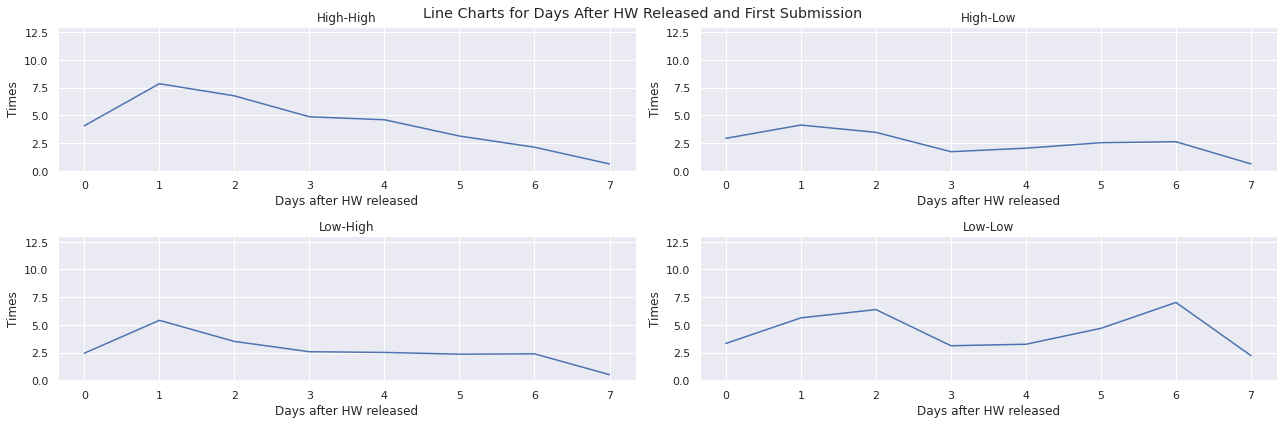

In [ ]:
fig, ax = plt.subplots(2, 2)

ax[0, 0].plot(df_0_hh['index'], df_0_hh['start_days']) #row=0, col=0
ax[1, 0].plot(df_0_lh['index'], df_0_lh['start_days']) #row=1, col=0
ax[0, 1].plot(df_0_hl['index'], df_0_hl['start_days']) #row=0, col=1
ax[1, 1].plot(df_0_ll['index'], df_0_ll['start_days']) #row=1, col=1
ax[0, 0].set_title('High-High')
ax[1, 0].set_title('Low-High')
ax[0, 1].set_title('High-Low')
ax[1, 1].set_title('Low-Low')

for row in ax: 
    for axes in row:
        axes.grid(True)

top_lim = (0 , 13) 
plt.suptitle('Line Charts for Days After HW Released and First Submission')
plt.setp(ax, xticks=[i for i in df_0_hh['index']], xticklabels=df_0_hh['index'], xlabel='Days after HW released', ylabel='Times', ylim=top_lim)
fig.tight_layout()
plt.show()


#### ii. 第一次期中考前，第一次繳交作業的時間分布

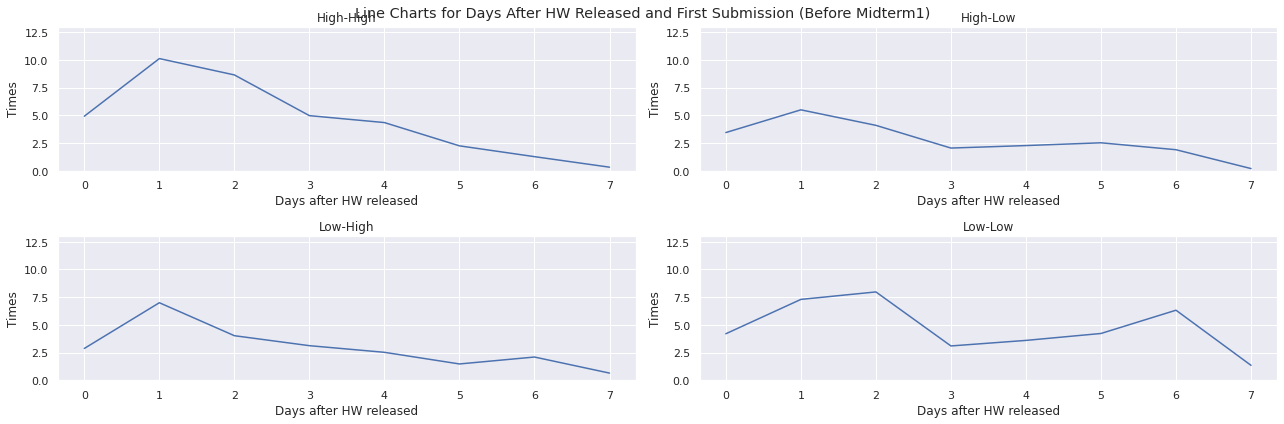

In [ ]:
fig, ax = plt.subplots(2, 2)

ax[0, 0].plot(df_1_hh['index'], df_1_hh['start_days']) #row=0, col=0
ax[1, 0].plot(df_1_lh['index'], df_1_lh['start_days']) #row=1, col=0
ax[0, 1].plot(df_1_hl['index'], df_1_hl['start_days']) #row=0, col=1
ax[1, 1].plot(df_1_ll['index'], df_1_ll['start_days']) #row=1, col=1
ax[0, 0].set_title('High-High')
ax[1, 0].set_title('Low-High')
ax[0, 1].set_title('High-Low')
ax[1, 1].set_title('Low-Low')

for row in ax: 
    for axes in row:
        axes.grid(True)

top_lim = (0 , 13) 
plt.suptitle('Line Charts for Days After HW Released and First Submission (Before Midterm1)')
plt.setp(ax, xticks=[i for i in df_1_hh['index']], xticklabels=df_1_hh['index'], xlabel='Days after HW released', ylabel='Times', ylim=top_lim)
fig.tight_layout()
plt.show()

#### iii. 第二次期中考前，第一次繳交作業的時間分布

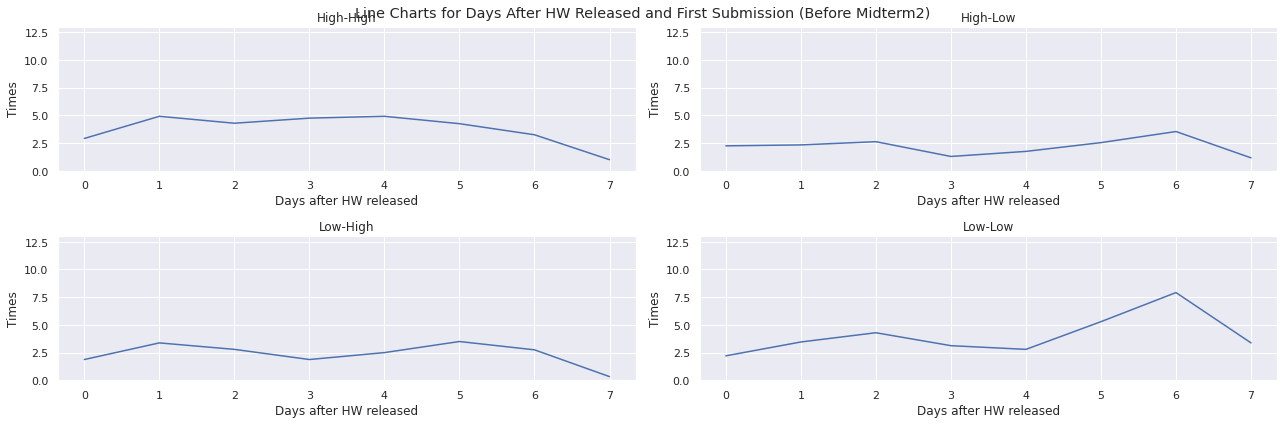

In [ ]:
fig, ax = plt.subplots(2, 2)

ax[0, 0].plot(df_2_hh['index'], df_2_hh['start_days']) #row=0, col=0
ax[1, 0].plot(df_2_lh['index'], df_2_lh['start_days']) #row=1, col=0
ax[0, 1].plot(df_2_hl['index'], df_2_hl['start_days']) #row=0, col=1
ax[1, 1].plot(df_2_ll['index'], df_2_ll['start_days']) #row=1, col=1
ax[0, 0].set_title('High-High')
ax[1, 0].set_title('Low-High')
ax[0, 1].set_title('High-Low')
ax[1, 1].set_title('Low-Low')

for row in ax: 
    for axes in row:
        axes.grid(True)

top_lim = (0 , 13) 
plt.suptitle('Line Charts for Days After HW Released and First Submission (Before Midterm2)')
plt.setp(ax, xticks=[i for i in df_2_hh['index']], xticklabels=df_2_hh['index'], xlabel='Days after HW released', ylabel='Times', ylim=top_lim)
fig.tight_layout()
plt.show()

### **分析結果與推論**
我們的預想為，高分群會比較早開始繳交作業，低分群會較晚開始繳交作業。

##### **第一次繳交作業的時間分布比較**
高高群、高低群、低高群的高峰皆在第 1 天，只有低低群的高峰出現在第 2 天和第 6 天，推測是因為低低群同時存在徹底放棄的人和很努力但還是考不好的人，如同前面所提過的。

##### **第一次期中考前、第二次期中考前，第一次繳交作業的時間分布比較**
高低群和低低群在第一次期中考後，繳交的高峰皆出現在第 6 天，有壓死線的跡象，推測這是他們轉向低分群的原因，和我們的猜測相同。

## **Q5 : 寫考古題考試成績會變好嗎？**

### **資料視覺化**

In [ ]:
# read dataset of doing the old exam or not
df_108_old_exam_before_mid1 = pd.read_csv("data/Stat_2021_a_2_PD108_OldExamOrNot.csv")
df_109_old_exam_before_mid1 = pd.read_csv("data/Stat_2021_a_2_PD109_OldExamOrNot.csv")
df_108_old_exam_before_mid2 = pd.read_csv("data/Stat_2021_a_2_PD108_OldExam2orNot.csv")
df_109_old_exam_before_mid2 = pd.read_csv("data/Stat_2021_a_2_PD109_OldExam2orNot.csv")

print("head of 108 do the old exam or not before mid1:")
display(df_108_old_exam_before_mid1.head())

head of 108 do the old exam or not before mid1:


,member_id,submission_id
0,14,NaN
1,57,153780.0
2,75,153799.0
3,175,NaN
4,376,NaN


In [ ]:
# read dataset of midterm scores
df_108_mid1 = pd.read_csv("data/Stat_2021_a_2_PD108_midterm1_score.csv")
df_108_mid2 = pd.read_csv("data/Stat_2021_a_2_PD108_midterm2_score.csv")
df_109_mid1 = pd.read_csv("data/Stat_2021_a_2_PD109_midterm1_score.csv")
df_109_mid2 = pd.read_csv("data/Stat_2021_a_2_PD109_midterm2_score.csv")

print("head of 108 midterm1 score:")
display(df_108_mid1.head())

head of 108 midterm1 score:


,account_id,score
0,1879,100.0
1,1914,100.0
2,1921,100.0
3,1980,100.0
4,1989,100.0


In [ ]:
# remove TA's data
TA_108 = [57, 75, 1285, 1758]
TA_109 = [14, 175, 1758, 1767, 587, 590, 707]

df_108_mid1 = df_108_mid1.drop(df_108_mid1[df_108_mid1["account_id"].isin(TA_108)].index)
df_108_mid2 = df_108_mid2.drop(df_108_mid2[df_108_mid2["account_id"].isin(TA_108)].index)
df_109_mid1 = df_109_mid1.drop(df_109_mid1[df_109_mid1["account_id"].isin(TA_109)].index)
df_109_mid2 = df_109_mid2.drop(df_109_mid2[df_109_mid2["account_id"].isin(TA_109)].index)

print("108 mid1 without TAs:")
print(df_108_mid1)

108 mid1 without TAs:
     account_id  score
0          1879  100.0
1          1914  100.0
2          1921  100.0
3          1980  100.0
4          1989  100.0
..          ...    ...
148        1530    NaN
149        1483    NaN
150        1690    NaN
151        2020    NaN
152        1698    NaN

[149 rows x 2 columns]


In [ ]:
# separate mid1 high and low scores
df_108_mid1_high = df_108_mid1.loc[df_108_mid1["score"] >= 72]
df_108_mid1_low = df_108_mid1.loc[df_108_mid1["score"] < 72]
df_109_mid1_high = df_109_mid1.loc[df_109_mid1["score"] >= 82]
df_109_mid1_low = df_109_mid1.loc[df_109_mid1["score"] < 82]

# mid2
df_108_mid2_high = df_108_mid2.loc[df_108_mid2["score"] >= 70]
df_108_mid2_low = df_108_mid2.loc[df_108_mid2["score"] < 70]
df_109_mid2_high = df_109_mid2.loc[df_109_mid2["score"] >= 56]
df_109_mid2_low = df_109_mid2.loc[df_109_mid2["score"] < 56]

print("108 midterm1 high score:")
print(df_108_mid1_high)

108 midterm1 high score:
    account_id  score
0         1879  100.0
1         1914  100.0
2         1921  100.0
3         1980  100.0
4         1989  100.0
5         1853  100.0
7         1864  100.0
8         1405  100.0
9         1881  100.0
10        1897   98.0
11        1923   98.0
13        1898   98.0
14        1685   98.0
15        1871   98.0
16        1214   98.0
18        1874   96.0
19        1892   96.0
20        2000   96.0
21        1899   96.0
22        1889   96.0
23        1755   94.0
24        1905   94.0
25         735   94.0
26         827   94.0
27        1870   94.0
28        1195   92.0
29        1927   92.0
30        1982   92.0
31        2026   90.0
32        1971   90.0
33        1918   90.0
34        2017   88.0
35        2006   88.0
36        2029   88.0
37        1890   88.0
38        2086   86.0
39        2024   86.0
40        1979   84.0
41        1953   84.0
42        1868   84.0
43        1878   84.0
44        1974   84.0
45        1631   82.0
46     

In [ ]:
# separate high scores in mid1 to high-high, high-low (low scores do the same)
df_108_high_high = df_108_mid1_high[df_108_mid1_high["account_id"].isin(df_108_mid2_high["account_id"])]
df_108_high_low = df_108_mid1_high[df_108_mid1_high["account_id"].isin(df_108_mid2_low["account_id"])]
df_108_low_high = df_108_mid1_low[df_108_mid1_low["account_id"].isin(df_108_mid2_high["account_id"])]
df_108_low_low = df_108_mid1_low[df_108_mid1_low["account_id"].isin(df_108_mid2_low["account_id"])]

# 109
df_109_high_high = df_109_mid1_high[df_109_mid1_high["account_id"].isin(df_109_mid2_high["account_id"])]
df_109_high_low = df_109_mid1_high[df_109_mid1_high["account_id"].isin(df_109_mid2_low["account_id"])]
df_109_low_high = df_109_mid1_low[df_109_mid1_low["account_id"].isin(df_109_mid2_high["account_id"])]
df_109_low_low = df_109_mid1_low[df_109_mid1_low["account_id"].isin(df_109_mid2_low["account_id"])]

print("108 high-high:")
print(df_108_high_high)

108 high-high:
    account_id  score
2         1921  100.0
4         1989  100.0
5         1853  100.0
7         1864  100.0
8         1405  100.0
10        1897   98.0
14        1685   98.0
15        1871   98.0
16        1214   98.0
18        1874   96.0
20        2000   96.0
21        1899   96.0
22        1889   96.0
25         735   94.0
26         827   94.0
27        1870   94.0
28        1195   92.0
29        1927   92.0
33        1918   90.0
35        2006   88.0
36        2029   88.0
38        2086   86.0
39        2024   86.0
41        1953   84.0
43        1878   84.0
46        1399   82.0
49        1946   78.0
52        1891   78.0
53        1888   78.0
55        1937   76.0
57        1986   74.0
58        1991   74.0
60        1995   72.0


In [ ]:
# check the number of people in each group
print(len(df_108_high_high))
print(len(df_108_high_low))
print(len(df_108_low_high))
print(len(df_108_low_low))

print(len(df_109_high_high))
print(len(df_109_high_low))
print(len(df_109_low_high))
print(len(df_109_low_low))

33
25
26
32
41
19
22
45


各群第一次期中前、第二次期中前有沒有做考古題

In [ ]:
# read dataset of doing the old exam or not
df_108_old_exam_before_mid1 = pd.read_csv("data/Stat_2021_a_2_PD108_OldExamOrNot.csv")
df_109_old_exam_before_mid1 = pd.read_csv("data/Stat_2021_a_2_PD109_OldExamOrNot.csv")
df_108_old_exam_before_mid2 = pd.read_csv("data/Stat_2021_a_2_PD108_OldExam2orNot.csv")
df_109_old_exam_before_mid2 = pd.read_csv("data/Stat_2021_a_2_PD109_OldExam2orNot.csv")

print("head of 108 do the old exam or not before mid1:")
display(df_108_old_exam_before_mid1.head())

head of 108 do the old exam or not before mid1:


,member_id,submission_id
0,14,NaN
1,57,153780.0
2,75,153799.0
3,175,NaN
4,376,NaN


In [ ]:
# divide dataset before mid1 into 108, 109 high-high, high-low, low-high, low-low
df_108_hh_old_exam_or_not_before_mid1 = df_108_old_exam_before_mid1[df_108_old_exam_before_mid1["member_id"].isin(df_108_high_high["account_id"])]
df_108_hl_old_exam_or_not_before_mid1 = df_108_old_exam_before_mid1[df_108_old_exam_before_mid1["member_id"].isin(df_108_high_low["account_id"])]
df_108_lh_old_exam_or_not_before_mid1 = df_108_old_exam_before_mid1[df_108_old_exam_before_mid1["member_id"].isin(df_108_low_high["account_id"])]
df_108_ll_old_exam_or_not_before_mid1 = df_108_old_exam_before_mid1[df_108_old_exam_before_mid1["member_id"].isin(df_108_low_low["account_id"])]

df_109_hh_old_exam_or_not_before_mid1 = df_109_old_exam_before_mid1[df_109_old_exam_before_mid1["member_id"].isin(df_109_high_high["account_id"])]
df_109_hl_old_exam_or_not_before_mid1 = df_109_old_exam_before_mid1[df_109_old_exam_before_mid1["member_id"].isin(df_109_high_low["account_id"])]
df_109_lh_old_exam_or_not_before_mid1 = df_109_old_exam_before_mid1[df_109_old_exam_before_mid1["member_id"].isin(df_109_low_high["account_id"])]
df_109_ll_old_exam_or_not_before_mid1 = df_109_old_exam_before_mid1[df_109_old_exam_before_mid1["member_id"].isin(df_109_low_low["account_id"])]

# beofore mid2
df_108_hh_old_exam_or_not_before_mid2 = df_108_old_exam_before_mid2[df_108_old_exam_before_mid2["member_id"].isin(df_108_high_high["account_id"])]
df_108_hl_old_exam_or_not_before_mid2 = df_108_old_exam_before_mid2[df_108_old_exam_before_mid2["member_id"].isin(df_108_high_low["account_id"])]
df_108_lh_old_exam_or_not_before_mid2 = df_108_old_exam_before_mid2[df_108_old_exam_before_mid2["member_id"].isin(df_108_low_high["account_id"])]
df_108_ll_old_exam_or_not_before_mid2 = df_108_old_exam_before_mid2[df_108_old_exam_before_mid2["member_id"].isin(df_108_low_low["account_id"])]

df_109_hh_old_exam_or_not_before_mid2 = df_109_old_exam_before_mid2[df_109_old_exam_before_mid2["member_id"].isin(df_109_high_high["account_id"])]
df_109_hl_old_exam_or_not_before_mid2 = df_109_old_exam_before_mid2[df_109_old_exam_before_mid2["member_id"].isin(df_109_high_low["account_id"])]
df_109_lh_old_exam_or_not_before_mid2 = df_109_old_exam_before_mid2[df_109_old_exam_before_mid2["member_id"].isin(df_109_low_high["account_id"])]
df_109_ll_old_exam_or_not_before_mid2 = df_109_old_exam_before_mid2[df_109_old_exam_before_mid2["member_id"].isin(df_109_low_low["account_id"])]

print("108 high-high old exam or not before mid1:")
print(df_108_hh_old_exam_or_not_before_mid1)

108 high-high old exam or not before mid1:
     member_id  submission_id
6          735            NaN
8          827            NaN
15        1195            NaN
16        1214            NaN
24        1399            NaN
25        1405            NaN
35        1685            NaN
42        1853            NaN
43        1864            NaN
47        1870       255027.0
48        1871       237954.0
51        1874            NaN
55        1878            NaN
63        1888            NaN
64        1889       261985.0
66        1891       262439.0
72        1897            NaN
74        1899            NaN
84        1918            NaN
85        1921            NaN
89        1927            NaN
92        1937            NaN
97        1946            NaN
98        1953            NaN
113       1986       255569.0
115       1989       288108.0
116       1991            NaN
118       1995            NaN
121       2000            NaN
124       2006            NaN
131       2024            N

In [ ]:
# compute the number of those who did the old exam in each group before mid1 (false = 總數 - true)
df_108_hh_old_exam_true_before_mid1 = df_108_hh_old_exam_or_not_before_mid1[df_108_hh_old_exam_or_not_before_mid1["submission_id"].isnull() != True]
df_108_hl_old_exam_true_before_mid1 = df_108_hl_old_exam_or_not_before_mid1[df_108_hl_old_exam_or_not_before_mid1["submission_id"].isnull() != True]
df_108_lh_old_exam_true_before_mid1 = df_108_lh_old_exam_or_not_before_mid1[df_108_lh_old_exam_or_not_before_mid1["submission_id"].isnull() != True]
df_108_ll_old_exam_true_before_mid1 = df_108_ll_old_exam_or_not_before_mid1[df_108_ll_old_exam_or_not_before_mid1["submission_id"].isnull() != True]

df_109_hh_old_exam_true_before_mid1 = df_109_hh_old_exam_or_not_before_mid1[df_109_hh_old_exam_or_not_before_mid1["submission_id"].isnull() != True]
df_109_hl_old_exam_true_before_mid1 = df_109_hl_old_exam_or_not_before_mid1[df_109_hl_old_exam_or_not_before_mid1["submission_id"].isnull() != True]
df_109_lh_old_exam_true_before_mid1 = df_109_lh_old_exam_or_not_before_mid1[df_109_lh_old_exam_or_not_before_mid1["submission_id"].isnull() != True]
df_109_ll_old_exam_true_before_mid1 = df_109_ll_old_exam_or_not_before_mid1[df_109_ll_old_exam_or_not_before_mid1["submission_id"].isnull() != True]

# before mid2
df_108_hh_old_exam_true_before_mid2 = df_108_hh_old_exam_or_not_before_mid2[df_108_hh_old_exam_or_not_before_mid2["submission_id"].isnull() != True]
df_108_hl_old_exam_true_before_mid2 = df_108_hl_old_exam_or_not_before_mid2[df_108_hl_old_exam_or_not_before_mid2["submission_id"].isnull() != True]
df_108_lh_old_exam_true_before_mid2 = df_108_lh_old_exam_or_not_before_mid2[df_108_lh_old_exam_or_not_before_mid2["submission_id"].isnull() != True]
df_108_ll_old_exam_true_before_mid2 = df_108_ll_old_exam_or_not_before_mid2[df_108_ll_old_exam_or_not_before_mid2["submission_id"].isnull() != True]

df_109_hh_old_exam_true_before_mid2 = df_109_hh_old_exam_or_not_before_mid2[df_109_hh_old_exam_or_not_before_mid2["submission_id"].isnull() != True]
df_109_hl_old_exam_true_before_mid2 = df_109_hl_old_exam_or_not_before_mid2[df_109_hl_old_exam_or_not_before_mid2["submission_id"].isnull() != True]
df_109_lh_old_exam_true_before_mid2 = df_109_lh_old_exam_or_not_before_mid2[df_109_lh_old_exam_or_not_before_mid2["submission_id"].isnull() != True]
df_109_ll_old_exam_true_before_mid2 = df_109_ll_old_exam_or_not_before_mid2[df_109_ll_old_exam_or_not_before_mid2["submission_id"].isnull() != True]

print("108 high-high, those who did the old exam before mid1:")
print(df_108_hh_old_exam_true_before_mid1)

108 high-high, those who did the old exam before mid1:
     member_id  submission_id
47        1870       255027.0
48        1871       237954.0
64        1889       261985.0
66        1891       262439.0
113       1986       255569.0
115       1989       288108.0


In [ ]:
# combine data from 108 and 109 before mid1
hh_old_exam_true_before_mid1 = len(df_108_hh_old_exam_true_before_mid1) + len(df_109_hh_old_exam_true_before_mid1)
hl_old_exam_true_before_mid1 = len(df_108_hl_old_exam_true_before_mid1) + len(df_109_hl_old_exam_true_before_mid1)
lh_old_exam_true_before_mid1 = len(df_108_lh_old_exam_true_before_mid1) + len(df_109_lh_old_exam_true_before_mid1)
ll_old_exam_true_before_mid1 = len(df_108_ll_old_exam_true_before_mid1) + len(df_109_ll_old_exam_true_before_mid1)

# before mid2
hh_old_exam_true_before_mid2 = len(df_108_hh_old_exam_true_before_mid2) + len(df_109_hh_old_exam_true_before_mid2)
hl_old_exam_true_before_mid2 = len(df_108_hl_old_exam_true_before_mid2) + len(df_109_hl_old_exam_true_before_mid2)
lh_old_exam_true_before_mid2 = len(df_108_lh_old_exam_true_before_mid2) + len(df_109_lh_old_exam_true_before_mid2)
ll_old_exam_true_before_mid2 = len(df_108_ll_old_exam_true_before_mid2) + len(df_109_ll_old_exam_true_before_mid2)

hh_cnt = len(df_108_high_high) + len(df_109_high_high)
hl_cnt = len(df_108_high_low) + len(df_109_high_low)
lh_cnt = len(df_108_low_high) + len(df_109_low_high)
ll_cnt = len(df_108_low_low) + len(df_109_low_low)

print("number of those who did the old exam in group of high-high:", hh_old_exam_true_before_mid1)

number of those who did the old exam in group of high-high: 16


In [ ]:
# turn necessary data before mid1 into dataframe for pie plots
hh_old_exam_before_mid1 = pd.DataFrame({'old_exam_or_not': ["did the old exam", "didn't do the old exam"], 'frequency': [hh_old_exam_true_before_mid1, hh_cnt - hh_old_exam_true_before_mid1]})
hl_old_exam_before_mid1 = pd.DataFrame({'old_exam_or_not': ["did the old exam", "didn't do the old exam"], 'frequency': [hl_old_exam_true_before_mid1, hl_cnt - hl_old_exam_true_before_mid1]})
lh_old_exam_before_mid1 = pd.DataFrame({'old_exam_or_not': ["did the old exam", "didn't do the old exam"], 'frequency': [lh_old_exam_true_before_mid1, lh_cnt - lh_old_exam_true_before_mid1]})
ll_old_exam_before_mid1 = pd.DataFrame({'old_exam_or_not': ["did the old exam", "didn't do the old exam"], 'frequency': [ll_old_exam_true_before_mid1, ll_cnt - ll_old_exam_true_before_mid1]})

# before mid2
hh_old_exam_before_mid2 = pd.DataFrame({'old_exam_or_not': ["did the old exam", "didn't do the old exam"], 'frequency': [hh_old_exam_true_before_mid2, hh_cnt - hh_old_exam_true_before_mid2]})
hl_old_exam_before_mid2 = pd.DataFrame({'old_exam_or_not': ["did the old exam", "didn't do the old exam"], 'frequency': [hl_old_exam_true_before_mid2, hl_cnt - hl_old_exam_true_before_mid2]})
lh_old_exam_before_mid2 = pd.DataFrame({'old_exam_or_not': ["did the old exam", "didn't do the old exam"], 'frequency': [lh_old_exam_true_before_mid2, lh_cnt - lh_old_exam_true_before_mid2]})
ll_old_exam_before_mid2 = pd.DataFrame({'old_exam_or_not': ["did the old exam", "didn't do the old exam"], 'frequency': [ll_old_exam_true_before_mid2, ll_cnt - ll_old_exam_true_before_mid2]})

print("dataframe of those who did the old exam in group of high-high:")
print(hh_old_exam_before_mid1)

dataframe of those who did the old exam in group of high-high:
          old_exam_or_not  frequency
0        did the old exam         16
1  didn't do the old exam         58


#### i. 第一次期中考前，寫考古題的比例

##### 高高群

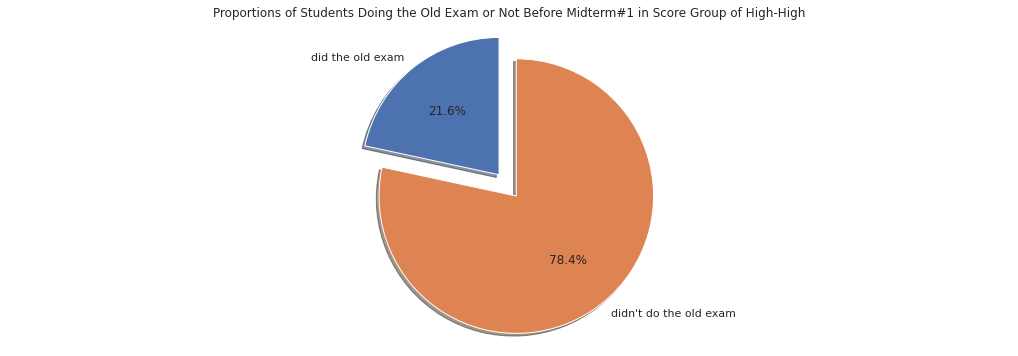

In [ ]:
sizes = hh_old_exam_before_mid1["frequency"]
labels = hh_old_exam_before_mid1["old_exam_or_not"]

fig1, ax1 = plt.subplots()        

explode = (0.1, 0.1)
ax1.pie(sizes, explode=explode, labels=labels, autopct="%1.1f%%", shadow=True, startangle=90)

ax1.axis("equal")             
plt.title("Proportions of Students Doing the Old Exam or Not Before Midterm#1 in Score Group of High-High")
plt.show()


##### 高低群

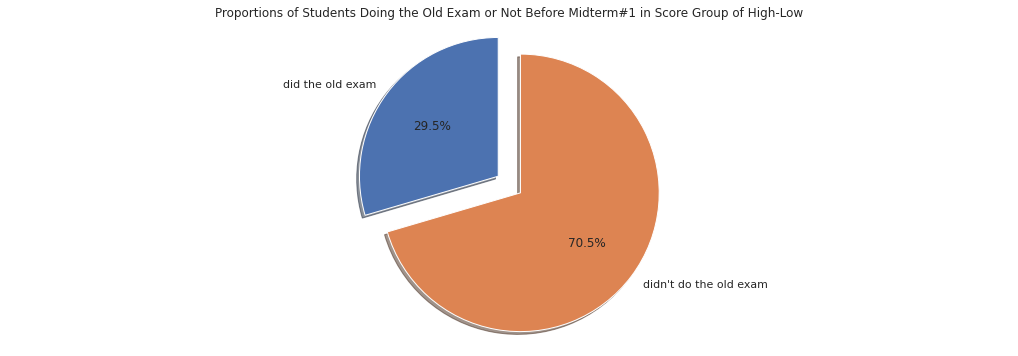

In [ ]:
sizes = hl_old_exam_before_mid1["frequency"]
labels = hl_old_exam_before_mid1["old_exam_or_not"]

fig1, ax1 = plt.subplots()        

explode = (0.1, 0.1)
ax1.pie(sizes, explode=explode, labels=labels, autopct="%1.1f%%", shadow=True, startangle=90)

ax1.axis("equal")             
plt.title("Proportions of Students Doing the Old Exam or Not Before Midterm#1 in Score Group of High-Low")
plt.show()

##### 低高群

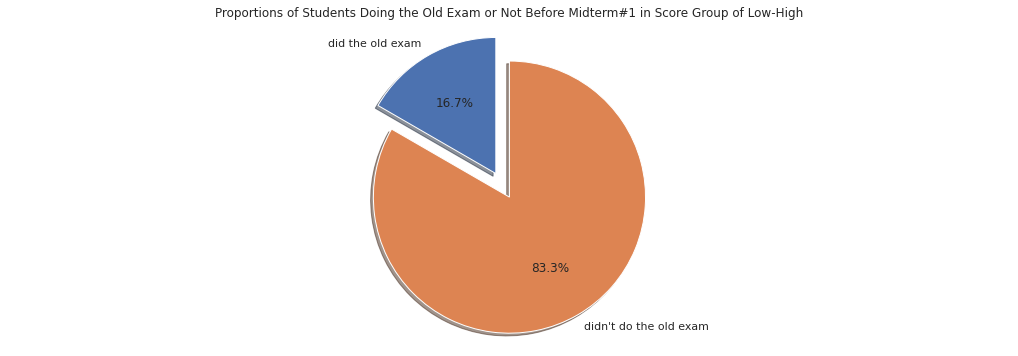

In [ ]:
sizes = lh_old_exam_before_mid1["frequency"]
labels = lh_old_exam_before_mid1["old_exam_or_not"]

fig1, ax1 = plt.subplots()        

explode = (0.1, 0.1)
ax1.pie(sizes, explode=explode, labels=labels, autopct="%1.1f%%", shadow=True, startangle=90)

ax1.axis("equal")             
plt.title("Proportions of Students Doing the Old Exam or Not Before Midterm#1 in Score Group of Low-High")
plt.show()


##### 低低群

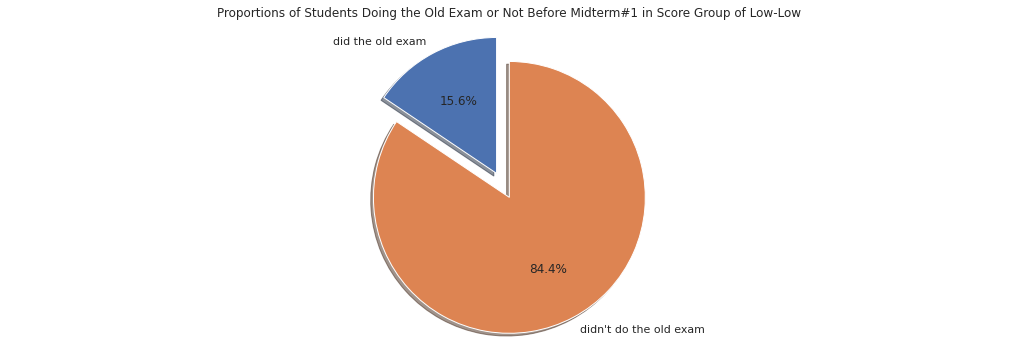

In [ ]:
sizes = ll_old_exam_before_mid1["frequency"]
labels = ll_old_exam_before_mid1["old_exam_or_not"]

fig1, ax1 = plt.subplots()        

explode = (0.1, 0.1)
ax1.pie(sizes, explode=explode, labels=labels, autopct="%1.1f%%", shadow=True, startangle=90)

ax1.axis("equal")             
plt.title("Proportions of Students Doing the Old Exam or Not Before Midterm#1 in Score Group of Low-Low")
plt.show()


#### ii. 第二次期中考前，寫考古題的比例

##### 高高群

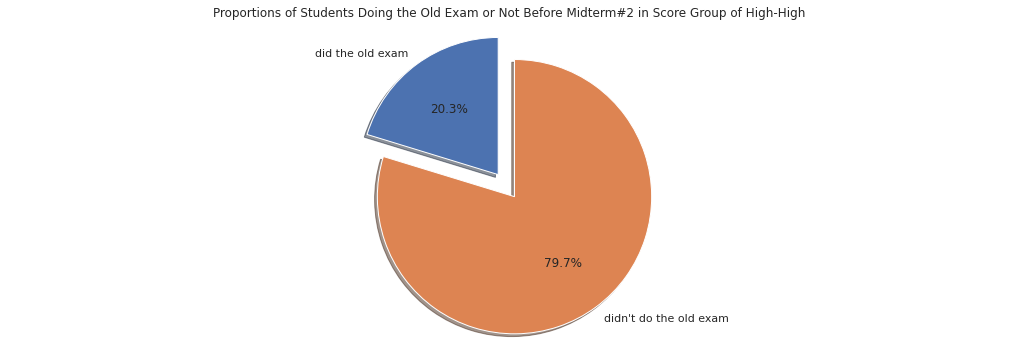

In [ ]:
sizes = hh_old_exam_before_mid2["frequency"]
labels = hh_old_exam_before_mid2["old_exam_or_not"]

fig1, ax1 = plt.subplots()        

explode = (0.1, 0.1)
ax1.pie(sizes, explode=explode, labels=labels, autopct="%1.1f%%", shadow=True, startangle=90)

ax1.axis("equal")             
plt.title("Proportions of Students Doing the Old Exam or Not Before Midterm#2 in Score Group of High-High")
plt.show()

##### 高低群

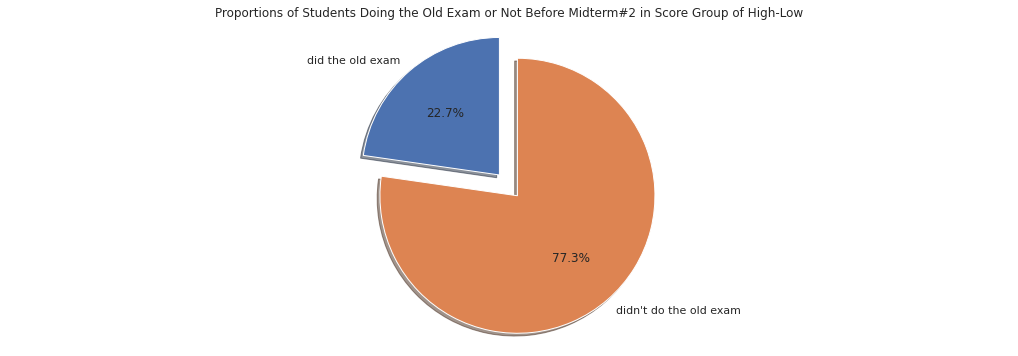

In [ ]:
sizes = hl_old_exam_before_mid2["frequency"]
labels = hl_old_exam_before_mid2["old_exam_or_not"]

fig1, ax1 = plt.subplots()        

explode = (0.1, 0.1)
ax1.pie(sizes, explode=explode, labels=labels, autopct="%1.1f%%", shadow=True, startangle=90)

ax1.axis("equal")             
plt.title("Proportions of Students Doing the Old Exam or Not Before Midterm#2 in Score Group of High-Low")
plt.show()

##### 低高群

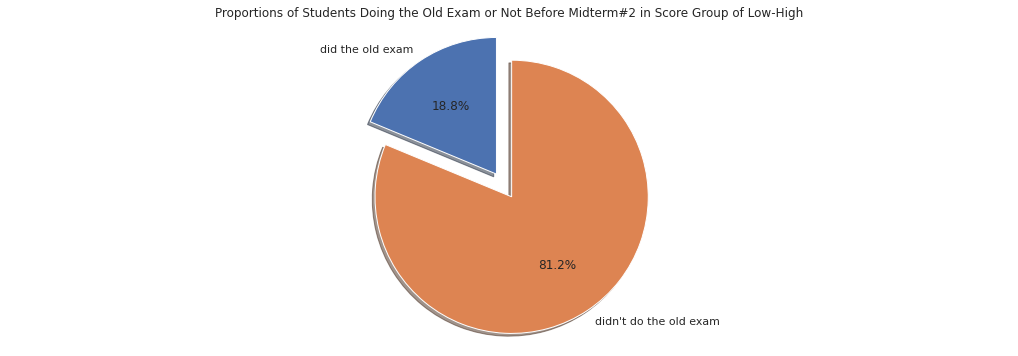

In [ ]:
sizes = lh_old_exam_before_mid2["frequency"]
labels = lh_old_exam_before_mid2["old_exam_or_not"]

fig1, ax1 = plt.subplots()        

explode = (0.1, 0.1)
ax1.pie(sizes, explode=explode, labels=labels, autopct="%1.1f%%", shadow=True, startangle=90)

ax1.axis("equal")             
plt.title("Proportions of Students Doing the Old Exam or Not Before Midterm#2 in Score Group of Low-High")
plt.show()

##### 低低群

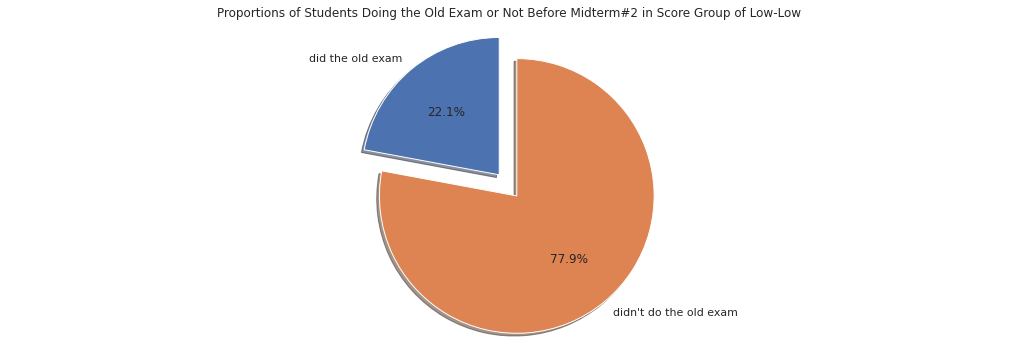

In [ ]:
sizes = ll_old_exam_before_mid2["frequency"]
labels = ll_old_exam_before_mid2["old_exam_or_not"]

fig1, ax1 = plt.subplots()        

explode = (0.1, 0.1)
ax1.pie(sizes, explode=explode, labels=labels, autopct="%1.1f%%", shadow=True, startangle=90)

ax1.axis("equal")             
plt.title("Proportions of Students Doing the Old Exam or Not Before Midterm#2 in Score Group of Low-Low")
plt.show()


### **分析結果與推論**

1. 低高群和低低群（第一次期中考皆屬於低分群者）寫考古題的比例明顯比高分群低。
2. 第二次期中前，低高群和低低群寫考古題的比例增加。低高群上升了2.1%，變化不大，而低低群上升了6.4%，上升幅度最大，我們認為可能是因為平時努力不夠，基礎沒有打好，導致就算寫了考古題，第二次期中仍然留在低分群。
3. 第二次期中前，高低群寫考古題的比例減少了6.8%。
4. 第二次期中前，高高群寫考古題的比例減少了1.3%，變化不大。

## **假設檢定估計**

我們認為在前面做繳交次數、上傳時間、考古題等分析當中，以第一次上傳的時間點最能代表一個人的讀書習慣，又因為我們想觀察低高群是如何進步的，因此選擇低高群在第一次上傳作業的時間點來做假設檢定。

In [ ]:
df = pd.read_csv("data/Stat_2021_a_2_PD108_ChallengeFirstSubmit.csv")
 
# delete TAs
df = df[(df['account_id'] != 57) 
        & (df['account_id'] != 75) 
        & (df['account_id'] != 1285) 
        & (df['account_id'] != 1758)]

# delete HW07 & HW10
df = df[(df['challenge_title'] != 'PD108-1 HW7') 
        & (df['challenge_title'] != 'PD108-1 HW10')]

pd.options.mode.chained_assignment = None  # default='warn'
df['challenge_start'] = pd.to_datetime(df['challenge_start'], format="%Y-%m-%d %H:%M:%S")
df['challenge_end'] = pd.to_datetime(df['challenge_end'], format="%Y-%m-%d %H:%M:%S")
df['submit_time'] = pd.to_datetime(df['submit_time'], format="%Y-%m-%d %H:%M:%S")

df['challenge_start_date'] = df['challenge_start'].dt.date
df['challenge_end_date'] = df['challenge_end'].dt.date
df['submit_time_date'] = df['submit_time'].dt.date

df = df.reset_index()
df['start_days'] = (df['submit_time_date'] - df['challenge_start_date']).dt.days

# delete very late submissions
df108 = df[(df['start_days'] <= 7)]
# display(df108.head())

df108_first_half = df108[(df108['challenge_title'] == 'PD108-1 HW0') 
                   | (df108['challenge_title'] == 'PD108-1 HW1')
                   | (df108['challenge_title'] == 'PD108-1 HW2')
                   | (df108['challenge_title'] == 'PD108-1 HW3')
                   | (df108['challenge_title'] == 'PD108-1 HW4')]

df108_second_half = df108[(df108['challenge_title'] == 'PD108-1 HW5') 
                   | (df108['challenge_title'] == 'PD108-1 HW6')
                   | (df108['challenge_title'] == 'PD108-1 HW8')
                   | (df108['challenge_title'] == 'PD108-1 HW9')]

df = pd.read_csv("data/Stat_2021_a_2_PD109_ChallengeFirstSubmit.csv")

# delete TAs
# 14 175 1758 1767 587 590 707
df = df[(df['account_id'] != 14) 
        & (df['account_id'] != 175) 
        & (df['account_id'] != 1758) 
        & (df['account_id'] != 1767) 
        & (df['account_id'] != 587) 
        & (df['account_id'] != 590) 
        & (df['account_id'] != 707)]

# delete HW04 & HW06 & HW07 & HW08
df = df[(df['challenge_title'] != 'PD109-1 HW4') 
        & (df['challenge_title'] != 'PD109-1 HW6') 
        & (df['challenge_title'] != 'PD109-1 HW7') 
        & (df['challenge_title'] != 'PD109-1 HW8')]

pd.options.mode.chained_assignment = None  # default='warn'
df['challenge_start'] = pd.to_datetime(df['challenge_start'], format="%Y-%m-%d %H:%M:%S")
df['challenge_end'] = pd.to_datetime(df['challenge_end'], format="%Y-%m-%d %H:%M:%S")
df['submit_time'] = pd.to_datetime(df['submit_time'], format="%Y-%m-%d %H:%M:%S")

df['challenge_start_date'] = df['challenge_start'].dt.date
df['challenge_end_date'] = df['challenge_end'].dt.date
df['submit_time_date'] = df['submit_time'].dt.date

df = df.reset_index()
df['start_days'] = (df['submit_time_date'] - df['challenge_start_date']).dt.days

# delete very late submissions
df109 = df[(df['start_days'] <= 7)]
# display(df109.head())

df109_first_half = df109[(df109['challenge_title'] == 'PD109-1 HW0') 
                   | (df109['challenge_title'] == 'PD109-1 HW1')
                   | (df109['challenge_title'] == 'PD109-1 HW2')
                   | (df109['challenge_title'] == 'PD109-1 HW3')]

df109_second_half = df109[(df109['challenge_title'] == 'PD109-1 HW5') 
                   | (df109['challenge_title'] == 'PD109-1 HW9')
                   | (df109['challenge_title'] == 'PD109-1 HW10')]

In [ ]:
df_mid1_score = pd.read_csv("data/Stat_2021_a_2_PD108_midterm1_score.csv")
df_mid2_score = pd.read_csv("data/Stat_2021_a_2_PD108_midterm2_score.csv")
df_score = pd.merge(df_mid1_score, df_mid2_score, how='outer', on='account_id').dropna()
df_score = df_score[(df_score['account_id'] != 57) & (df_score['account_id'] != 75) & (df_score['account_id'] != 1285) & (df_score['account_id'] != 1758)]

# grouping and save account ids
df_high_high_108 = df_score[(df_score['score_x'] >= 72) & (df_score['score_y'] >= 70)]
df_high_low_108 = df_score[(df_score['score_x'] >= 72) & (df_score['score_y'] < 70)]
df_low_high_108 = df_score[(df_score['score_x'] < 72) & (df_score['score_y'] >= 70)]
df_low_low_108 = df_score[(df_score['score_x'] < 72) & (df_score['score_y'] < 70)]

In [ ]:
df_lh_start_days_period1 = pd.DataFrame(columns=['start_days'])
df_lh_start_days_period2 = pd.DataFrame(columns=['start_days'])

In [ ]:
index_p1_108 = 0
for i in range(df108_first_half.count()[0]):
    for current_account in df_low_high_108.account_id:
        if df108_first_half.iloc[i].account_id == current_account:
            df_lh_start_days_period1.loc[index_p1_108] = df108_first_half.iloc[i].start_days
            index_p1_108 += 1
print(index_p1_108)
print(df_lh_start_days_period1.mean())
print(df_lh_start_days_period1.std())
df_lh_start_days_period1

129
start_days    2.387597
dtype: float64
start_days    1.9498
dtype: float64


,start_days
0,3
1,2
2,2
3,6
4,6
...,...
124,7
125,6
126,3
127,6


In [ ]:
index_p2_108 = 0
for i in range(df108_second_half.count()[0]):
    for current_account in df_low_high_108.account_id:
        if df108_second_half.iloc[i].account_id == current_account:
            df_lh_start_days_period2.loc[index_p2_108] = df108_second_half.iloc[i].start_days
            index_p2_108 += 1
print(index_p2_108)
print(df_lh_start_days_period2.mean())
print(df_lh_start_days_period2.std())
df_lh_start_days_period2

96
start_days    2.854167
dtype: float64
start_days    1.99989
dtype: float64


,start_days
0,2
1,3
2,5
3,6
4,6
...,...
91,5
92,6
93,6
94,6


In [ ]:
df_mid1_score = pd.read_csv("data/Stat_2021_a_2_PD109_midterm1_score.csv")
df_mid2_score = pd.read_csv("data/Stat_2021_a_2_PD109_midterm2_score.csv")
df_score = pd.merge(df_mid1_score, df_mid2_score, how='outer', on='account_id').dropna()
df_score = df_score[(df_score['account_id'] != 14)
                    & (df_score['account_id'] != 175)
                    & (df_score['account_id'] != 1758)
                    & (df_score['account_id'] != 1767)
                    & (df_score['account_id'] != 587)
                    & (df_score['account_id'] != 590)
                    & (df_score['account_id'] != 707)]

# grouping and save account ids
df_high_high_109 = df_score[(df_score['score_x'] >= 82) & (df_score['score_y'] >= 56)]
df_high_low_109 = df_score[(df_score['score_x'] >= 82) & (df_score['score_y'] < 56)]
df_low_high_109 = df_score[(df_score['score_x'] < 82) & (df_score['score_y'] >= 56)]
df_low_low_109 = df_score[(df_score['score_x'] < 82) & (df_score['score_y'] < 56)]

### i.
### $\mu$ before midterm : 低高群在第一次期中考前，平均第一次繳交時間（第一次期中考為低分群）
#### $H_0$: $\mu$ before midterm <= 3（天）
#### $H_1$: $\mu$ before midterm > 3（天）
#### $\alpha = 0.05$, right-tailed test

In [ ]:
index_p1_109 = index_p1_108
print(index_p1_109)
for i in range(df109_first_half.count()[0]):
    for current_account in df_low_high_109.account_id:
        if df109_first_half.iloc[i].account_id == current_account:
            df_lh_start_days_period1.loc[index_p1_109] = df109_first_half.iloc[i].start_days
            index_p1_109 += 1
print(df_lh_start_days_period1.mean())
print(df_lh_start_days_period1.std())
print(index_p1_109)
df_lh_start_days_period1

129
start_days    2.472222
dtype: float64
start_days    1.943185
dtype: float64
216


,start_days
0,3
1,2
2,2
3,6
4,6
...,...
211,6
212,7
213,1
214,6


In [ ]:
# null hypothesis population mean
h0mean = 3
# sample size
n = 216
alpha = 0.05

# sample mean
xbar = df_lh_start_days_period1['start_days'].mean()
# sample std
std = df_lh_start_days_period1['start_days'].std()

print(f"Mean = {xbar:.4f}")
print(f"Std. Dev. = {std:.4f}")

tcv = stats.t.ppf(1-alpha, df=n-1)
print(f"t critical value = {tcv:.4f}")

# Testing Statistic
tstat = (xbar-h0mean) / (std/(n**0.5))
print(f"t value = {tstat:.4f}")

# p-value
pvalue = 1-stats.t.cdf(tstat, df=n-1)
print(f"p-value = {pvalue:.4f}")

Mean = 2.4722
Std. Dev. = 1.9432
t critical value = 1.6520
t value = -3.9918
p-value = 1.0000


### t-test 結果：
p-value (1) is larger than the significance level (0.05) so without sufficient evidence, we can't infer at the 5% significance level that the mean first submission time for low-high group before the first midterm is greater than 3 days.

**沒有足夠證據顯示低高群在第一次期中考前的第一次繳交時間晚於作業發下的第 3 天**

### ii.
### $\mu$ after midterm : 低高群在第二次期中考前，平均第一次繳交時間（第二次期中考為高分群） 
#### $H_0$: $\mu$ after midterm >= 3（天）
#### $H_1$: $\mu$ after midterm < 3（天）
#### $\alpha = 0.05$, left tailed test

In [ ]:
index_p2_109 = index_p2_108
print(index_p2_109)
for i in range(df109_second_half.count()[0]):
    for current_account in df_low_high_109.account_id:
        if df109_second_half.iloc[i].account_id == current_account:
            df_lh_start_days_period2.loc[index_p2_109] = df109_second_half.iloc[i].start_days
            index_p2_109 += 1
print(df_lh_start_days_period2.mean())
print(df_lh_start_days_period2.std())
print(index_p2_109)
df_lh_start_days_period2

96
start_days    3.144928
dtype: float64
start_days    2.041721
dtype: float64
138


,start_days
0,2
1,3
2,5
3,6
4,6
...,...
133,6
134,5
135,7
136,5


In [ ]:
# null hypothesis population mean
h0mean = 3
# sample size
n = 138
alpha = 0.05

# sample mean
xbar = df_lh_start_days_period2['start_days'].mean()
# sample std
std = df_lh_start_days_period2['start_days'].std()

print(f"Mean = {xbar:.4f}")
print(f"Std. Dev. = {std:.4f}")

tcv = stats.t.ppf(alpha, df=n-1)
print(f"t critical value = {tcv:.4f}")

# Testing Statistic
tstat = (xbar-h0mean) / (std/(n**0.5))
print(f"t value = {tstat:.4f}")

# p-value
pvalue = stats.t.cdf(tstat, df=n-1)
print(f"p-value = {pvalue:.4f}")

Mean = 3.1449
Std. Dev. = 2.0417
t critical value = -1.6561
t value = 0.8339
p-value = 0.7971


### t-test 結果：
p-value (0.7971) is larger than the significance level (0.05) so without sufficient evidence, we cannot infer at the 5% significance level that the mean first submission time for low-high group before the second midterm is less than 3 days.

**沒有足夠證據顯示低高群在第二次期中考前的第一次繳交時間早於作業發下的第 3 天**

### 假設檢定總結：
期中前後，低高群沒有提早開始寫作業！

## **結論與建議**

* ### Q1: 作業成績是否跟考試有關？

> A : 對，有中等程度的正向線性關係 (moderate positive linear relationship)。

* ### Q2: 作業繳交越多次，考試成績會越好嗎？ 

> A : 不一定，考試成績可能和其他因素有關，像是難度、運氣、天份、臨場應變、作業抄襲、課程基礎沒有學好等。

* ### Q3: 死線戰士不分你我？ 

>A : 對，但高高群在死線前預留了更多時間。

* ### Q4: 高分群都超前部署？ 

>A : 對。
第一次期中前，高高群、高低群、低高群的高峰皆在第 1 天，低低群則在第 2 和第 6 天出現高峰。

* ### Q5: 寫考古題考試成績會變好嗎？ 

> A : 不一定！
>- 低低群第二次期中有寫考古題的比例上升了 6.4%。
>- 高低群第二次期中有寫考古題的比例下降了 6.8%，低高群上升了 2.1%。 


### 假設檢定結果
原本推測低高群進步跟學習動機有關，但檢定後發現低高群第一次期中後反而較晚開始繳交作業，沒有足夠證據證明第一次繳交作業的時間和成績進步有關。因此可能受其他因素的影響程度較大。

### 總結
我們從第一點發現作業成績與考試成績呈正相關，而在後面三點則發現繳交作業的習慣跟考試成績沒有明顯關係。

此外，高低群、低高群的行為大多很相似，所以我們認為所有學生都很努力的繳交作業，因此推測其他因素如，難度、運氣、天份、臨場應變、作業抄襲等也都是影響程式設計課程的考試表現之原因。

### 給未來修習程式設計的學生之建議

**若平時能提早準備，打好基礎功，還是會有顯著的進步！！！**
- 就算作業已經 AC 了也可以繼續優化自己的程式碼，幫自己打好基礎。
- 早一點開始寫作業，預留多一點時間消化課程內容。